### Dependências

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from pandas import read_excel
from scipy.optimize import curve_fit
import math
from statistics import mean
import copy as copy

### Importação de dados

In [28]:
df = pd.read_excel('Planilha do raio-x.xlsx', sheet_name='Dados', header=None, names=['A', 'B', 'C', 'D','E', 'F'])
df = df.replace({',': '.'}, regex=True)
hs = pd.read_excel('Planilha do raio-x.xlsx', sheet_name='Hist', header=None, names=['A', 'B'])
tm = pd.read_excel('Planilha do raio-x.xlsx', sheet_name='TMorto', header=None, names=['A', 'B'])
tm = tm.replace({',':'.'}, regex=True)
abs = pd.read_excel('Planilha do raio-x.xlsx', sheet_name='Absortancia', header=None, names=['A', 'B', 'C', 'D'])
abs = abs.replace({',': '.'}, regex=True)

print(df)

        A   B   C   D  E  F
0     2.5  14  10   4  3  2
1     2.6  17   9   2  4  0
2     2.7  25   7   5  6  0
3     2.8  11   7   9  8  0
4     2.9  14   8   6  1  0
..    ...  ..  ..  .. .. ..
271  29.6  20   6   7  8  2
272  29.7  24  12  10  7  1
273  29.8  29  11   9  2  0
274  29.9  29  10  11  2  1
275  30.0  33  24  14  7  2

[276 rows x 6 columns]


### Histograma

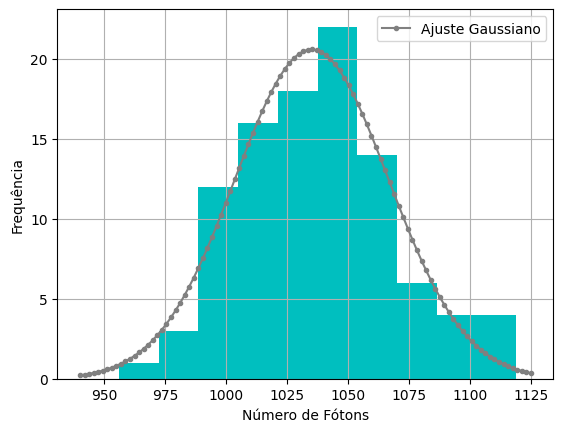

[  31.47859349 1035.07849987 1624.21463737] 
 [[ 1.39873378e+00 -4.17088082e-03  3.61946008e+01]
 [-4.17088082e-03  1.37083861e+00 -1.23656177e-01]
 [ 3.61946008e+01 -1.23656177e-01  2.75585561e+03]]
31.47859348888352
32.211799080461184


In [29]:
def gaussB(x, a, b, N):
    return N*(1/(a*(2*math.pi)**(1/2)))*np.exp((-(x-b)**2/(2*a**2)))

Nbins = int(math.sqrt(mean(hs['B']))/3)



ListaOrdHist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
LarguraBarra = (max(hs['B']) - min(hs['B']))/10
ListaAbsHist = []

for i in range(10):
    for j in range(len(hs['B'])):
        if min(hs['B']) + i*LarguraBarra  <= hs['B'][j] <= min(hs['B']) + (i+1)*LarguraBarra:
            ListaOrdHist[i] = ListaOrdHist[i] + 1
    ListaAbsHist = ListaAbsHist + [min(hs['B']) + LarguraBarra*i + LarguraBarra/2]


poptHist, pcovHist = curve_fit(gaussB, ListaAbsHist, ListaOrdHist, bounds=([10, 930, 0], [120, 2000, 10000]), absolute_sigma=True) #a, b, N

rgBL2 = np.linspace(940, 1125, 100)


plt.hist(hs['B'], bins=Nbins, color='c')
plt.plot(rgBL2, gaussB(rgBL2, *poptHist), marker = '.', color = 'Gray', label='Ajuste Gaussiano')
plt.legend()
plt.xlabel('Número de Fótons')
plt.ylabel('Frequência')
plt.grid()
plt.show()

print(poptHist,'\n', pcovHist)

SigmaHist = poptHist[0]
print(SigmaHist)
print(mean(hs['B'])**(1/2))


### Caracterização do tempo morto 

Parâmetro a: 2777.563298298777 
Incerteza Parâmetro a: 68.11467227519947 
Parâmetro b: 26.792354455752843 
Incerteza Parâmetro b: 12.653468934468133


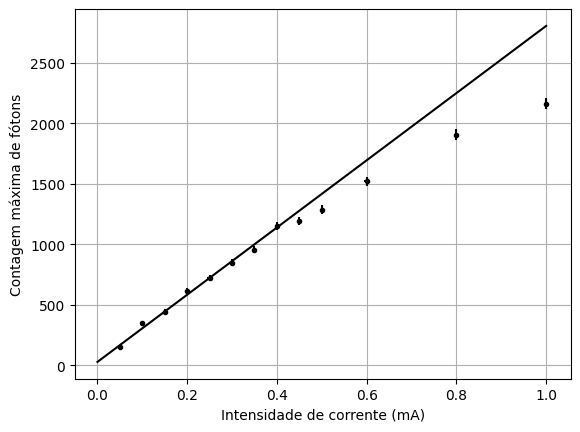

Parâmetro a: 0.00033881495201452055 
Incerteza Parâmetro a: 5.868523993309211e-06 
Parâmetro b (TEMPO MORTO): 2.295154448358778e-05 
Incerteza Parâmetro b (TEMPO MORTO): 1.0927078381892604e-05


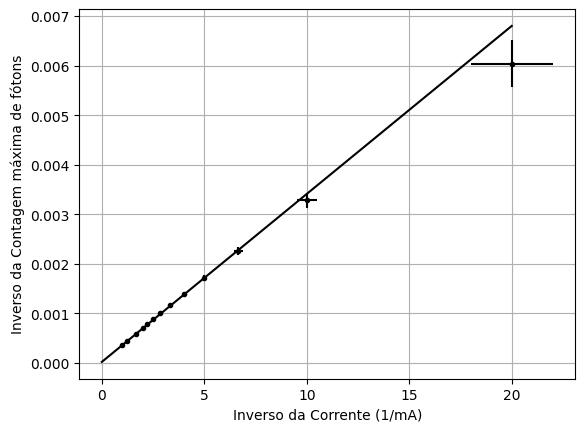

       A     B          C      D          E         F         G         H
0   0.05   148  12.165525  0.005  20.000000  0.006036  0.000477  2.000000
1   0.10   345  18.574176  0.005  10.000000  0.003284  0.000155  0.500000
2   0.15   442  21.023796  0.005   6.666667  0.002255  0.000083  0.222222
3   0.20   617  24.839485  0.005   5.000000  0.001717  0.000055  0.125000
4   0.25   721  26.851443  0.005   4.000000  0.001387  0.000041  0.080000
5   0.30   847  29.103264  0.005   3.333333  0.001163  0.000032  0.055556
6   0.35   956  30.919250  0.005   2.857143  0.001001  0.000027  0.040816
7   0.40  1149  33.896903  0.005   2.500000  0.000879  0.000023  0.031250
8   0.45  1190  34.496377  0.005   2.222222  0.000783  0.000020  0.024691
9   0.50  1285  35.846897  0.005   2.000000  0.000706  0.000018  0.020000
10  0.60  1519  38.974351  0.005   1.666667  0.000591  0.000015  0.013889
11  0.80  1906  43.657760  0.005   1.250000  0.000445  0.000011  0.007812
12  1.00  2163  46.508064  0.005   1.0

In [30]:
tm['C'] = np.sqrt(tm['B'])
tm['D'] = 0.005

def ajusteTempoMorto(x,a,b):
    return a*x + b

def ajusteTempoMorto2(R,t):
    return(R/(R*t+1))


tmAjuste1 = tm.query('0 <= A <= 0.4')


poptTM, pcovTM = curve_fit(ajusteTempoMorto, tmAjuste1['A'], tmAjuste1['B'], sigma=tmAjuste1['C'], absolute_sigma=True)

print('Parâmetro a:', poptTM[0], '\nIncerteza Parâmetro a:', np.sqrt(pcovTM[0][0]) ,'\nParâmetro b:', poptTM[1], '\nIncerteza Parâmetro b:', np.sqrt(pcovTM[1][1]))

x1 = np.linspace(0,1,200)

plt.errorbar(tm['A'], tm['B'], tm['C'], tm['D'], '.k')
plt.plot(x1,ajusteTempoMorto(x1,poptTM[0],poptTM[1]), 'k')
plt.xlabel('Intensidade de corrente (mA)')
plt.ylabel('Contagem máxima de fótons')
plt.grid()
plt.show()

tm['E'] = 1/tm['A']
tm['F'] = 1/ajusteTempoMorto(tm['A'],poptTM[0],poptTM[1])
tm['G'] = tm['F']**2 * np.sqrt((tm['A'])**2 * pcovTM[0][0] + pcovTM[1][1])
tm['H'] = tm['E']**2 * tm['D']

poptTM2, pcovTM2 = curve_fit(ajusteTempoMorto, tm['E'], tm['F'], sigma=tm['G'], absolute_sigma = True)
print('Parâmetro a:', poptTM2[0], '\nIncerteza Parâmetro a:', np.sqrt(pcovTM2[0][0]) ,'\nParâmetro b (TEMPO MORTO):', poptTM2[1], '\nIncerteza Parâmetro b (TEMPO MORTO):', np.sqrt(pcovTM2[1][1]))

x2 = np.linspace(0,20,200)

plt.errorbar(tm['E'], tm['F'], tm['G'], tm['H'], '.k')
plt.plot(x2,ajusteTempoMorto(x2,poptTM2[0],poptTM2[1]), 'k')
plt.xlabel("Inverso da Corrente (1/mA)")
plt.ylabel("Inverso da Contagem máxima de fótons")
plt.grid()
plt.show()

df['B'] = df['B']/(1-(pcovTM2[1][1]*df['B']))
df['C'] = df['C']/(1-(pcovTM2[1][1]*df['C']))
df['D'] = df['D']/(1-(pcovTM2[1][1]*df['D']))
df['E'] = df['E']/(1-(pcovTM2[1][1]*df['E']))
df['F'] = df['F']/(1-(pcovTM2[1][1]*df['F']))

TempoMorto = poptTM2[1]
SigmaTMorto = np.sqrt(pcovTM2[1][1])


'''
# R = a*x + b, sendo que a e b são os parametros ajustados pela função ajusteTempoMorto(x,a,b)

def ajusteTempoMorto2(x,t):
    return((poptTM[0]*x+poptTM[1])/((poptTM[0]*x+poptTM[1])*t+1))

poptTM3, pcovTM3 = curve_fit(ajusteTempoMorto2, tmAjuste1['A'], tmAjuste1['B'], bounds=([0.00001], [0.001]))

plt.errorbar(tm['A'], tm['B'], tm['C'], tm['D'], '.k')
plt.plot(x1,ajusteTempoMorto2(x1,*poptTM3), 'k')
plt.xlabel('Intensidade de corrente (mA)')
plt.ylabel('Contagem máxima de fótons')
plt.grid()
plt.show()

print('Parâmetro t:', poptTM3[0])'''

print(tm)



### Plot 35KV, 30KV, 28KV, 25KV, 18KV

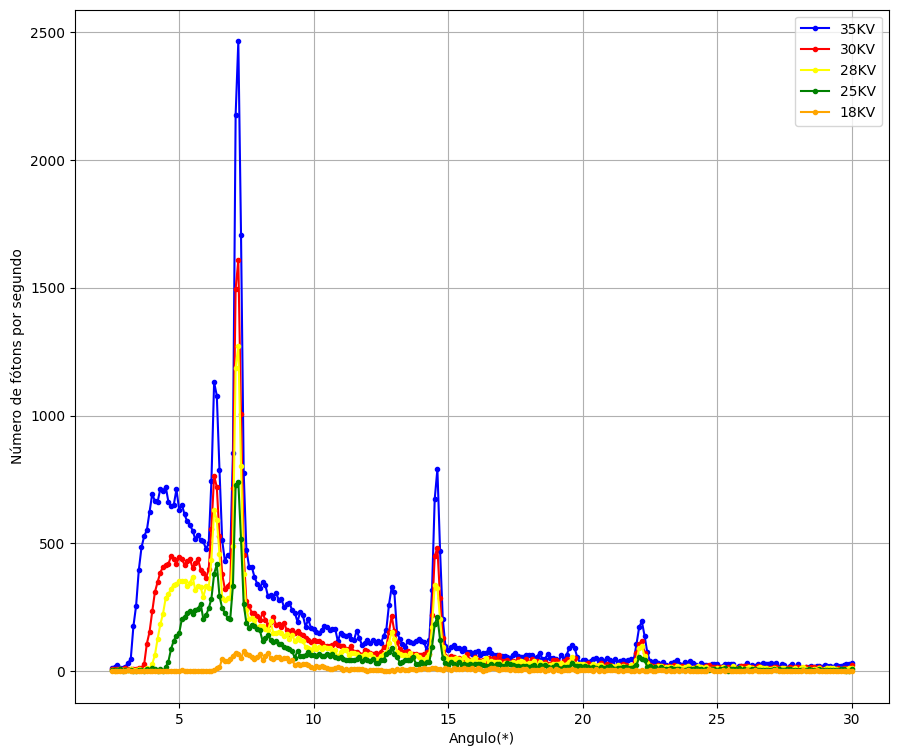

        A     B     C     D    E    F
0     2.5  14.0  10.0   4.0  3.0  2.0
1     2.6  17.0   9.0   2.0  4.0  0.0
2     2.7  25.0   7.0   5.0  6.0  0.0
3     2.8  11.0   7.0   9.0  8.0  0.0
4     2.9  14.0   8.0   6.0  1.0  0.0
..    ...   ...   ...   ...  ...  ...
271  29.6  20.0   6.0   7.0  8.0  2.0
272  29.7  24.0  12.0  10.0  7.0  1.0
273  29.8  29.0  11.0   9.0  2.0  0.0
274  29.9  29.0  10.0  11.0  2.0  1.0
275  30.0  33.0  24.0  14.0  7.0  2.0

[276 rows x 6 columns]


In [31]:
plt.figure(figsize=(10.5, 9))

plt.plot(df['A'], df['B'], label='35KV', marker='.', color='Blue')
plt.plot(df['A'], df['C'], label='30KV', marker='.', color='Red')
plt.plot(df['A'], df['D'], label='28KV', marker='.', color='Yellow')
plt.plot(df['A'], df['E'], label='25KV', marker='.', color='Green')
plt.plot(df['A'], df['F'], label='18KV', marker='.', color='Orange')
plt.xlabel('Angulo(*)')
plt.ylabel('Número de fótons por segundo')
plt.grid()
plt.legend()
plt.show()

print(df)

### Calculo de I_a / I_b == n_a / n_b pela hipótese de planck, e posterior análise de picos

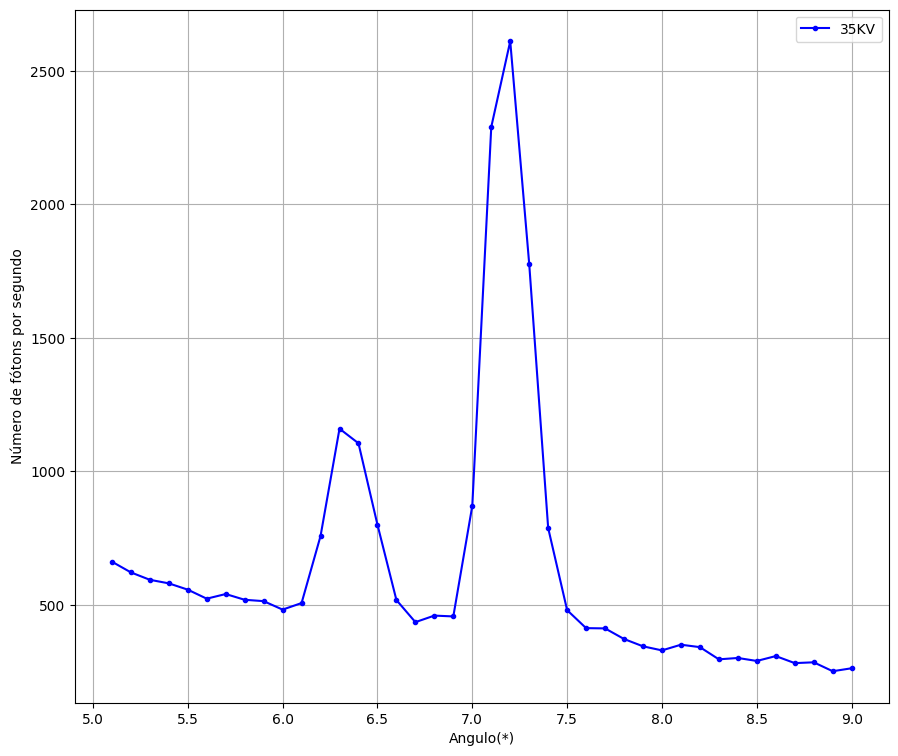

Para o pico alfa : 
 a =  0.01444494944429664 
 b =  7.187514278662501 
 N =  2358.2413133805444 
 c =  299.99999999999994 
 Matriz de covariancia : 
 [[ 1.33657013e-06 -3.61361030e-07 -1.30408374e-02 -4.11303916e-02]
 [-3.61361030e-07  9.33438995e-06 -2.30563094e-02  1.99367748e-02]
 [-1.30408374e-02 -2.30563094e-02  5.09302803e+03 -5.08521836e+02]
 [-4.11303916e-02  1.99367748e-02 -5.08521836e+02  1.70941347e+03]] 
 Ajuste do pico alfa já considerando incertezas :


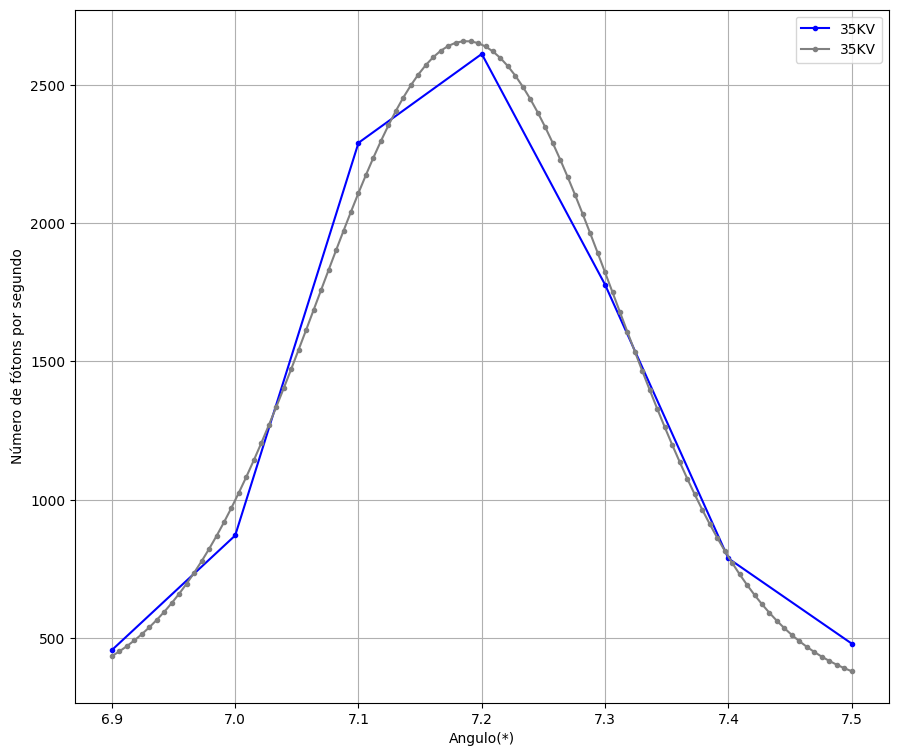

Para o pico Beta : 
 a =  0.024594445761593645 
 b =  6.347618420280956 
 N =  830.3284922549828 
 c =  299.99999999999994 
 Matriz de covariancia : 
 [[ 1.33109465e-05 -1.98998304e-06  9.27744904e-02 -1.55643837e-01]
 [-1.98998304e-06  2.44610175e-05 -3.61538905e-02  3.90495321e-02]
 [ 9.27744904e-02 -3.61538905e-02  2.01312275e+03 -1.65989531e+03]
 [-1.55643837e-01  3.90495321e-02 -1.65989531e+03  2.18220533e+03]] 
 Ajuste do pico beta já considerando incertezas :


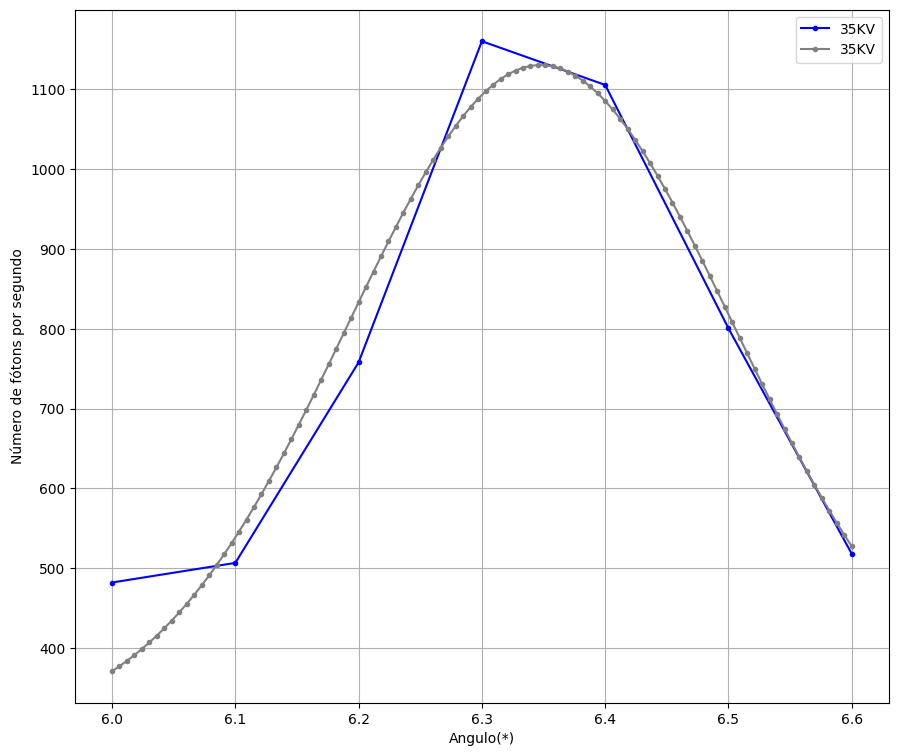

Razão [2.351742286950058, 0.1532483535123472]


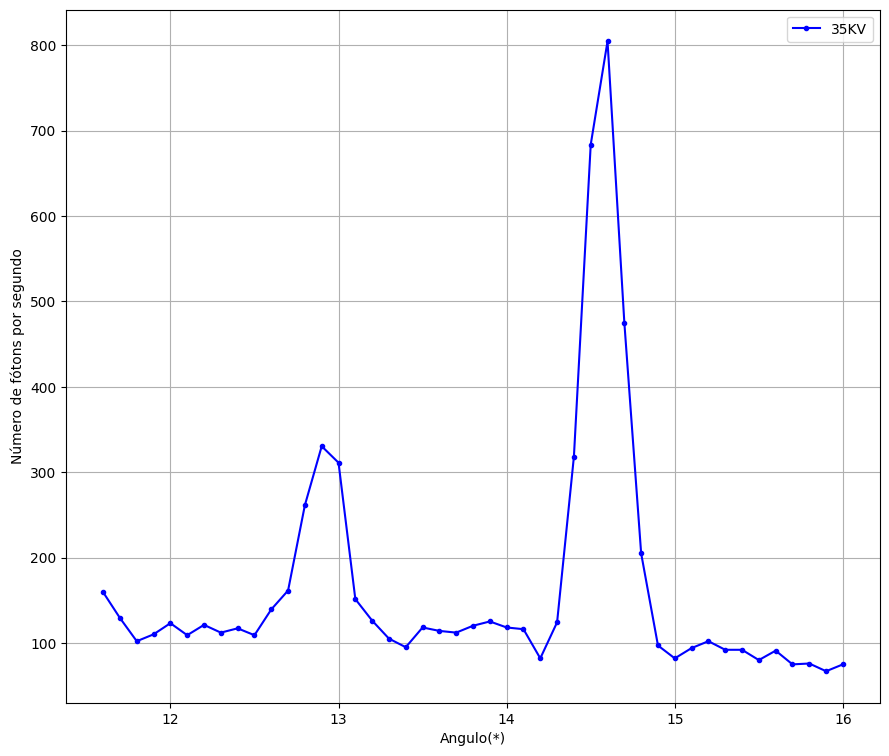

Para o pico alfa : 
 a =  0.013404286272702777 
 b =  14.574534241676343 
 N =  733.5710725160449 
 c =  83.58518231573237 
 Matriz de covariancia : 
 [[ 1.56283253e-06 -2.56529641e-08 -3.65375167e-03 -1.50519685e-02]
 [-2.56529641e-08  1.43322827e-05 -1.56720831e-03  8.83868450e-04]
 [-3.65375167e-03 -1.56720831e-03  6.42739157e+02 -9.92592738e+01]
 [-1.50519685e-02  8.83868450e-04 -9.92592738e+01  2.22381533e+02]] 
 Ajuste do pico alfa já considerando incertezas :


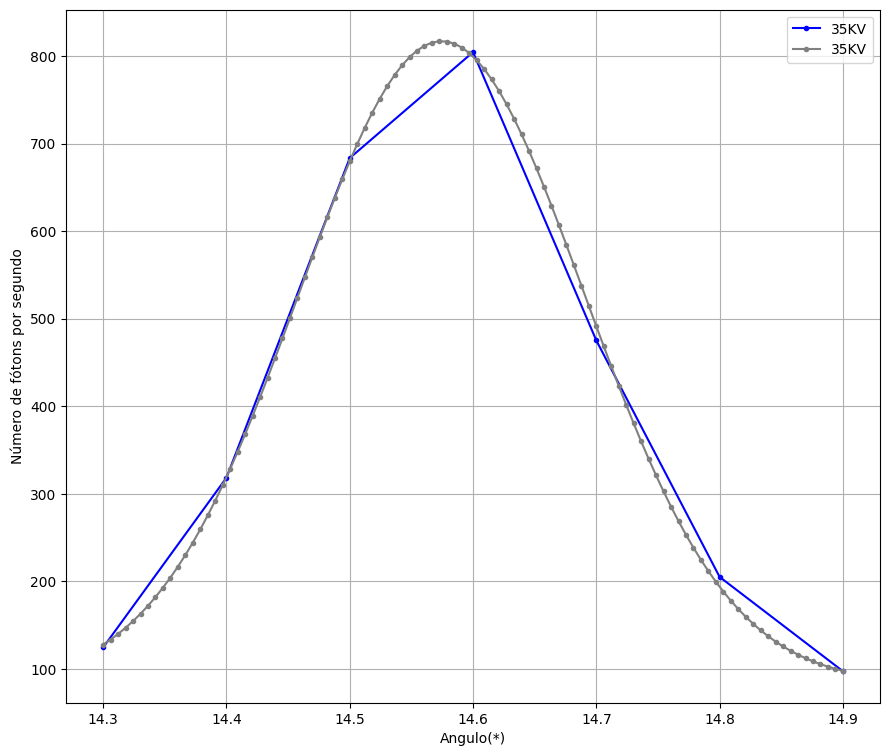

Para o pico Beta : 
 a =  0.011227561012683343 
 b =  12.90912869238754 
 N =  223.3616530961365 
 c =  126.05379837712103 
 Matriz de covariancia : 
 [[ 5.05708653e-06 -1.79922625e-07 -3.69033467e-03 -1.70825247e-02]
 [-1.79922625e-07  6.29729329e-05  4.28524076e-03 -4.01891305e-04]
 [-3.69033467e-03  4.28524076e-03  2.90210476e+02 -6.21749908e+01]
 [-1.70825247e-02 -4.01891305e-04 -6.21749908e+01  1.05101422e+02]] 
 Ajuste do pico beta já considerando incertezas :


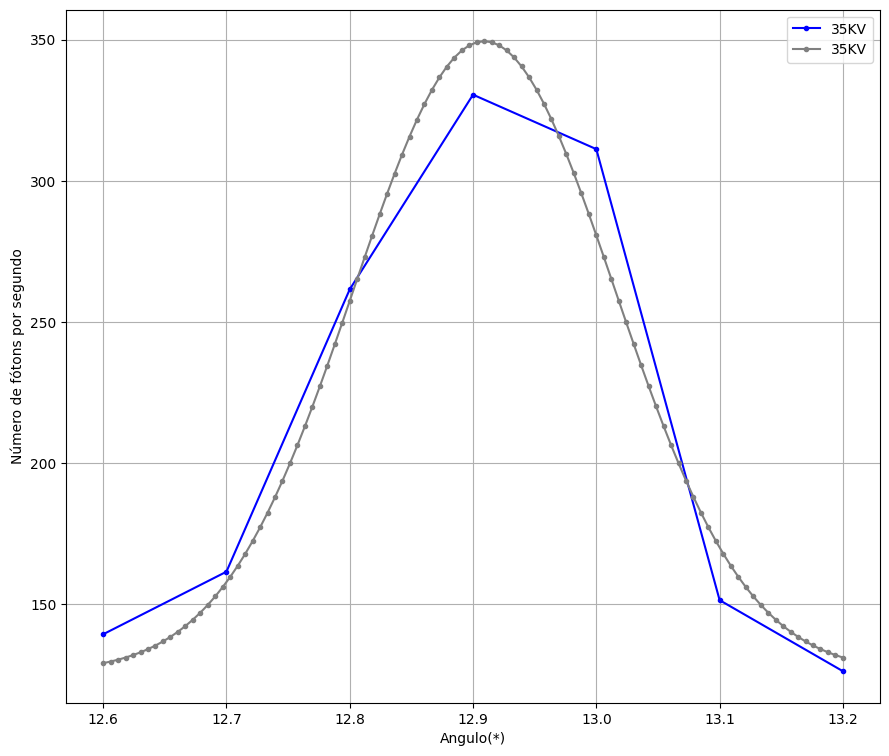

Razão [2.338638006379973, 0.15746223294402958]


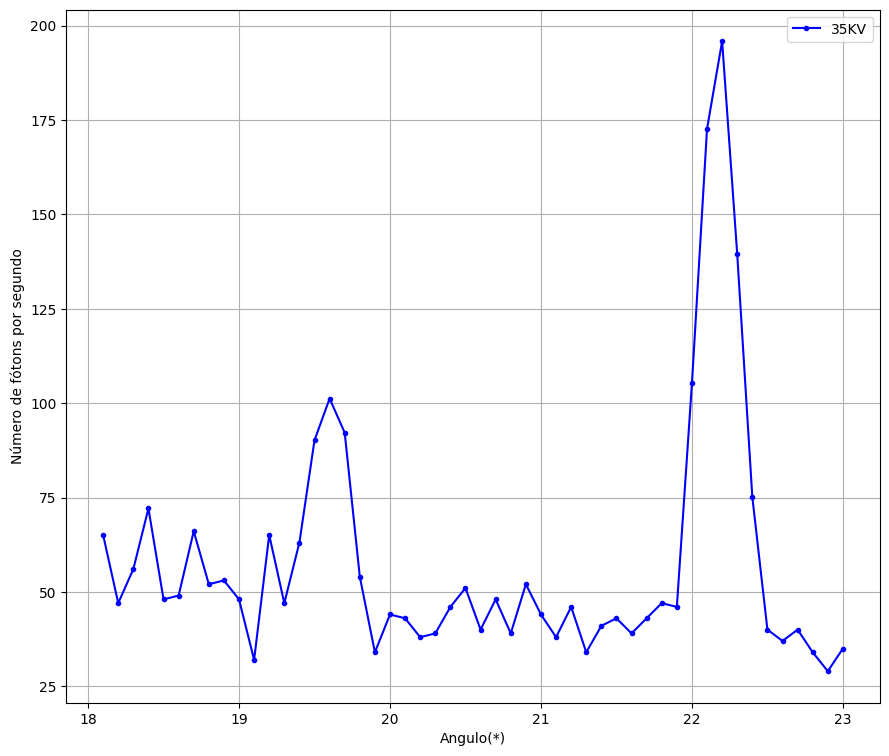

Para o pico alfa : 
 a =  0.019197433813674072 
 b =  22.178058972314254 
 N =  170.97373966024347 
 c =  26.602761923830446 
 Matriz de covariancia : 
 [[ 2.02210848e-05  1.83124646e-06  1.94541851e-02 -4.99421552e-02]
 [ 1.83124646e-06  6.02075314e-05  2.75093123e-03 -5.31005539e-03]
 [ 1.94541851e-02  2.75093123e-03  1.63347483e+02 -9.41212315e+01]
 [-4.99421552e-02 -5.31005539e-03 -9.41212315e+01  1.50468529e+02]] 
 Ajuste do pico alfa já considerando incertezas :


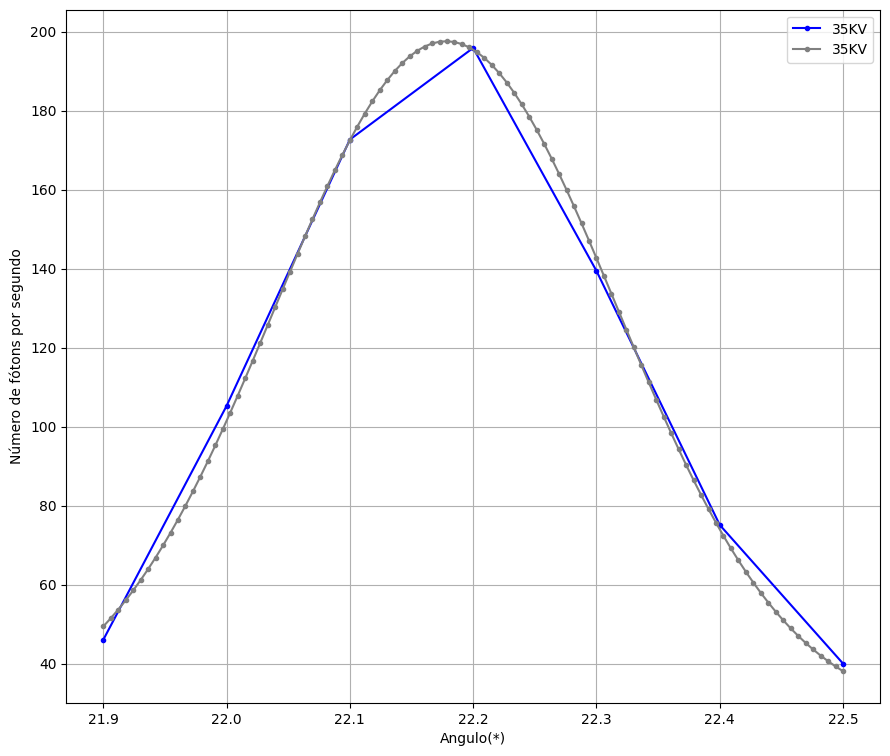

Para o pico Beta : 
 a =  0.026729198961593648 
 b =  19.582636040248786 
 N =  78.08842920531731 
 c =  24.288044797389652 
 Matriz de covariancia : 
 [[ 2.28105197e-04  2.62697577e-05  1.92989005e-01 -2.65161519e-01]
 [ 2.62697577e-05  2.03474455e-04  3.69252071e-02 -3.96946893e-02]
 [ 1.92989005e-01  3.69252071e-02  2.65947109e+02 -2.71289035e+02]
 [-2.65161519e-01 -3.96946893e-02 -2.71289035e+02  3.38430734e+02]] 
 Ajuste do pico beta já considerando incertezas :


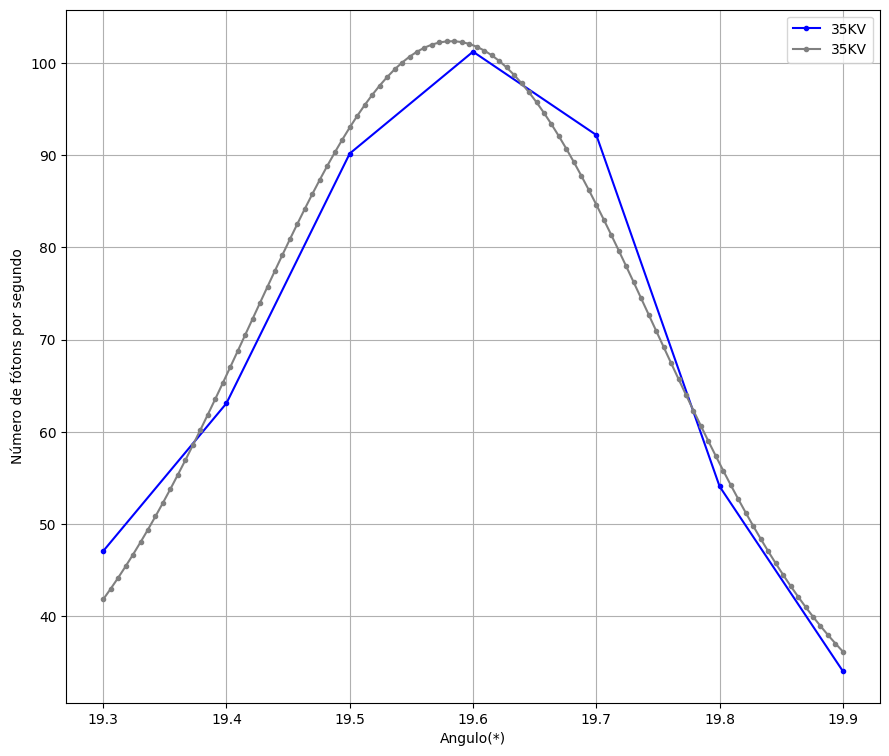

Razão [1.929901410541349, 0.49468572988890147]


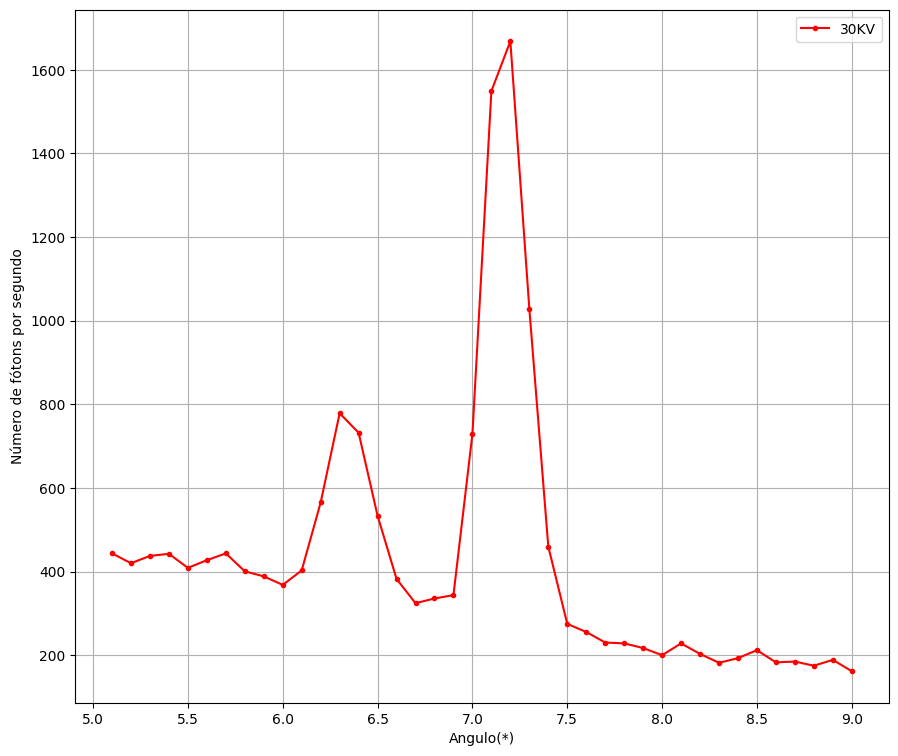

Para o pico alfa : 
 a =  0.012997518055664323 
 b =  7.169204646730952 
 N =  1500.095515561494 
 c =  253.5769872156755 
 Matriz de covariancia : 
 [[ 1.09436966e-06 -4.70331883e-08 -6.32157149e-03 -2.18952113e-02]
 [-4.70331883e-08  1.05805568e-05 -5.10231863e-03  2.81080018e-03]
 [-6.32157149e-03 -5.10231863e-03  2.07297232e+03 -2.85137634e+02]
 [-2.18952113e-02  2.81080018e-03 -2.85137634e+02  6.70204041e+02]] 
 Ajuste do pico alfa já considerando incertezas :


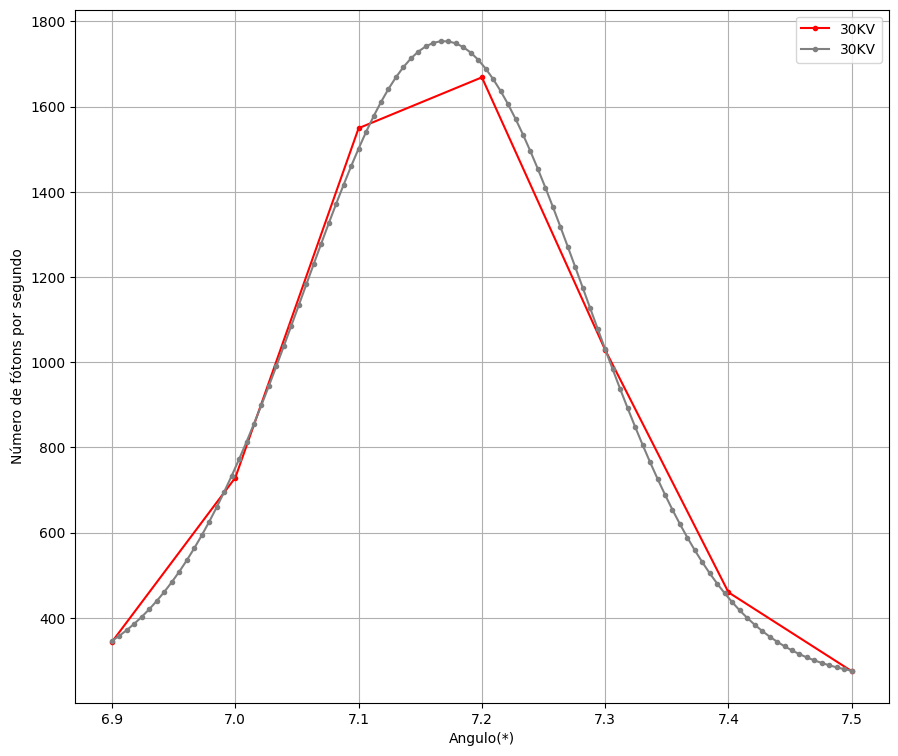

Para o pico Beta : 
 a =  0.01928964454526693 
 b =  6.338460582422631 
 N =  475.35503642617243 
 c =  299.99999999999994 
 Matriz de covariancia : 
 [[ 1.34794328e-05 -1.42998683e-06  4.65641631e-02 -9.73665780e-02]
 [-1.42998683e-06  4.33155057e-05 -1.42045693e-02  1.67978134e-02]
 [ 4.65641631e-02 -1.42045693e-02  9.59657710e+02 -6.47694004e+02]
 [-9.73665780e-02  1.67978134e-02 -6.47694004e+02  9.04186690e+02]] 
 Ajuste do pico beta já considerando incertezas :


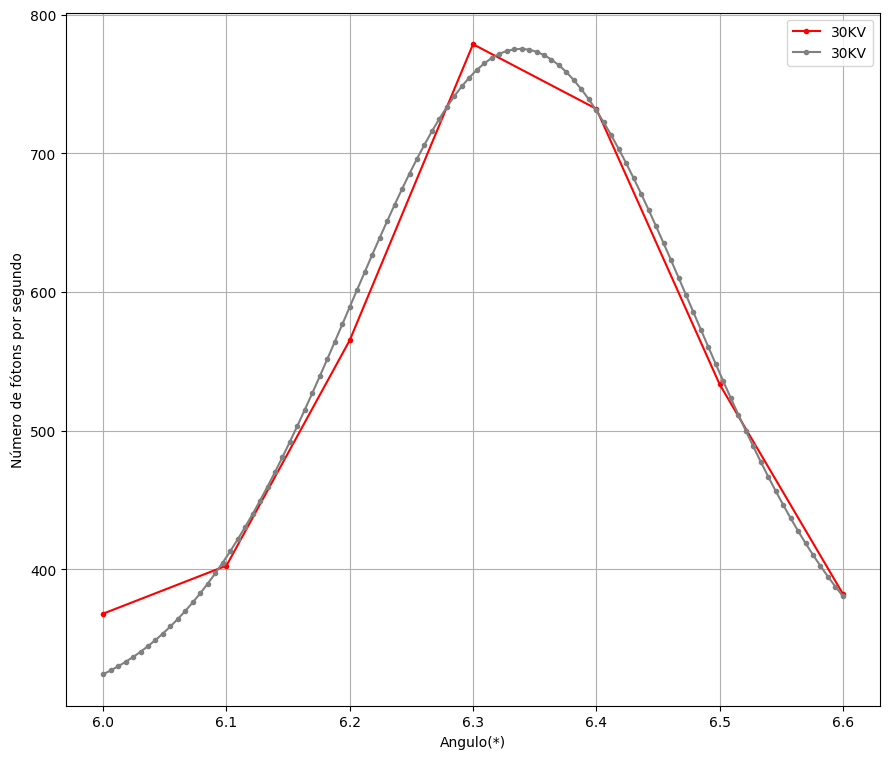

Razão [2.261767087836735, 0.14290926540863683]


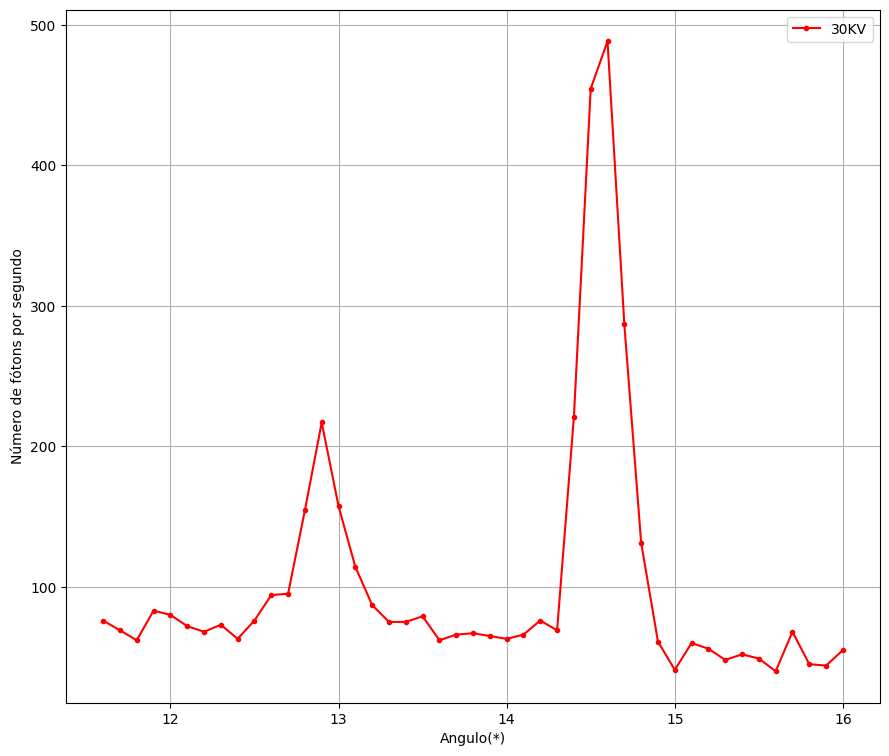

Para o pico alfa : 
 a =  0.014189205524117515 
 b =  14.56974257514333 
 N =  466.6113593514885 
 c =  45.21571099957749 
 Matriz de covariancia : 
 [[ 2.41418559e-06  2.97472809e-08 -2.82082958e-03 -1.46453208e-02]
 [ 2.97472809e-08  1.95467482e-05 -3.02874291e-03  7.69327700e-04]
 [-2.82082958e-03 -3.02874291e-03  3.54106991e+02 -5.72440004e+01]
 [-1.46453208e-02  7.69327700e-04 -5.72440004e+01  1.30541213e+02]] 
 Ajuste do pico alfa já considerando incertezas :


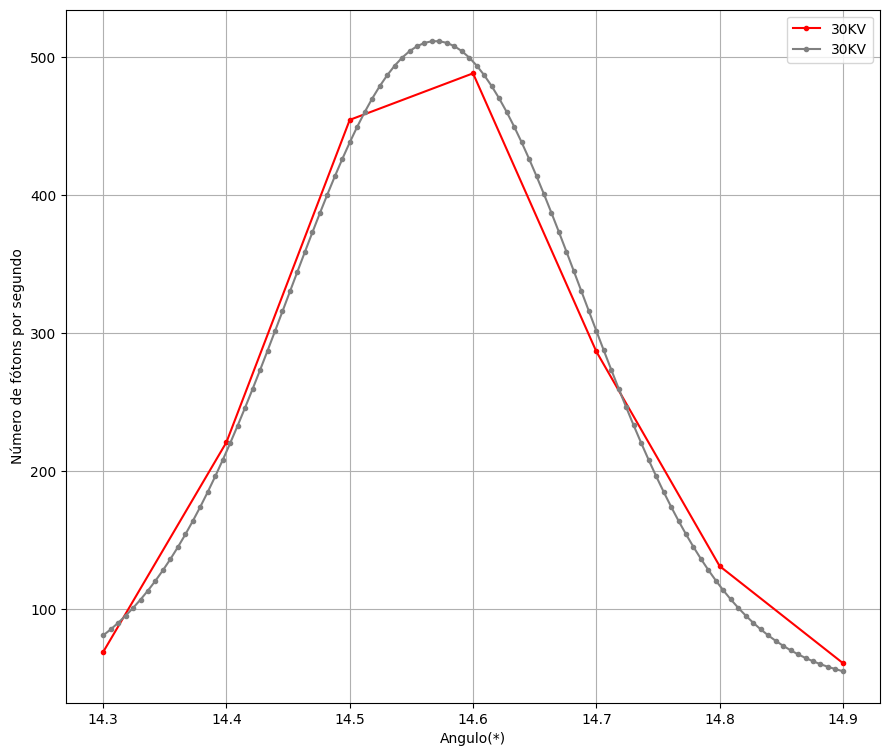

Para o pico Beta : 
 a =  0.008356004409974823 
 b =  12.906415592337778 
 N =  123.45277176669504 
 c =  90.78245633016716 
 Matriz de covariancia : 
 [[ 5.43351882e-06  2.52287356e-08 -9.02552770e-03 -9.98512958e-03]
 [ 2.52287356e-08  1.07599107e-04 -2.91620237e-03  7.39606033e-04]
 [-9.02552770e-03 -2.91620237e-03  2.00350441e+02 -2.55121112e+01]
 [-9.98512958e-03  7.39606033e-04 -2.55121112e+01  4.54420861e+01]] 
 Ajuste do pico beta já considerando incertezas :


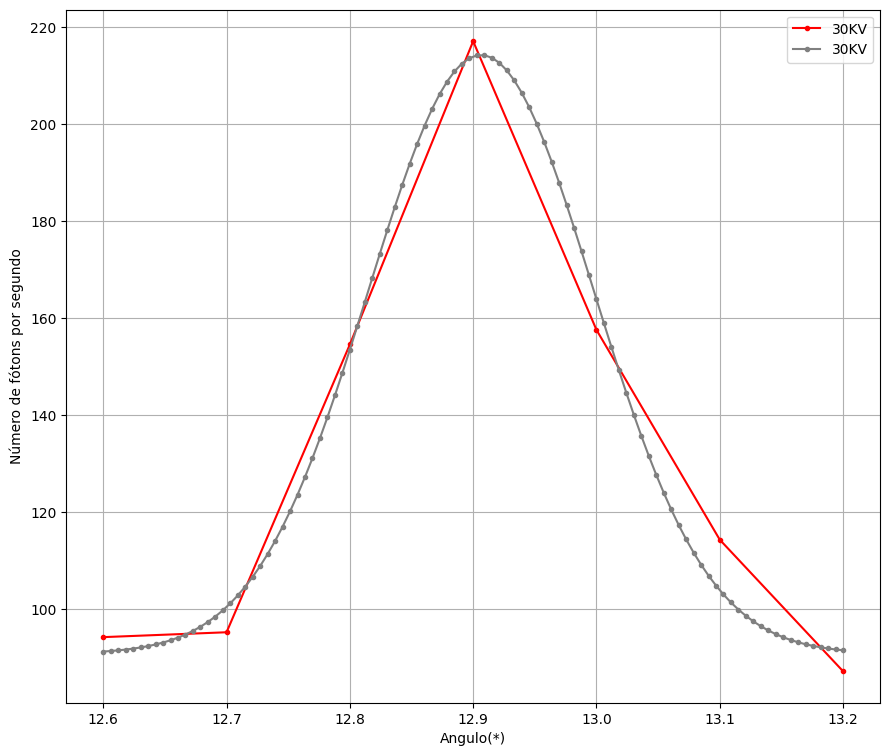

Razão [2.3890892030121837, 0.20279657964094777]


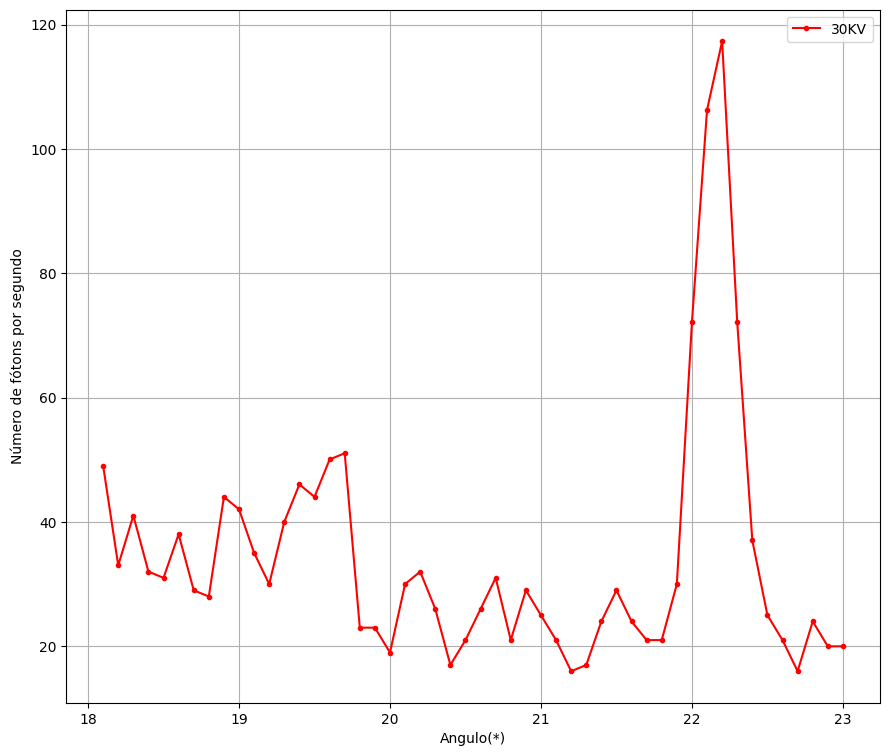

Para o pico alfa : 
 a =  0.01580095970811855 
 b =  22.15779381656791 
 N =  99.1996337265276 
 c =  21.17117972814917 
 Matriz de covariancia : 
 [[ 1.58938466e-05  1.19023326e-06  1.01505931e-03 -2.14525535e-02]
 [ 1.19023326e-06  1.01509630e-04  2.26218579e-03 -3.12159421e-03]
 [ 1.01505931e-03  2.26218579e-03  8.27068856e+01 -2.39286929e+01]
 [-2.14525535e-02 -3.12159421e-03 -2.39286929e+01  4.23078065e+01]] 
 Ajuste do pico alfa já considerando incertezas :


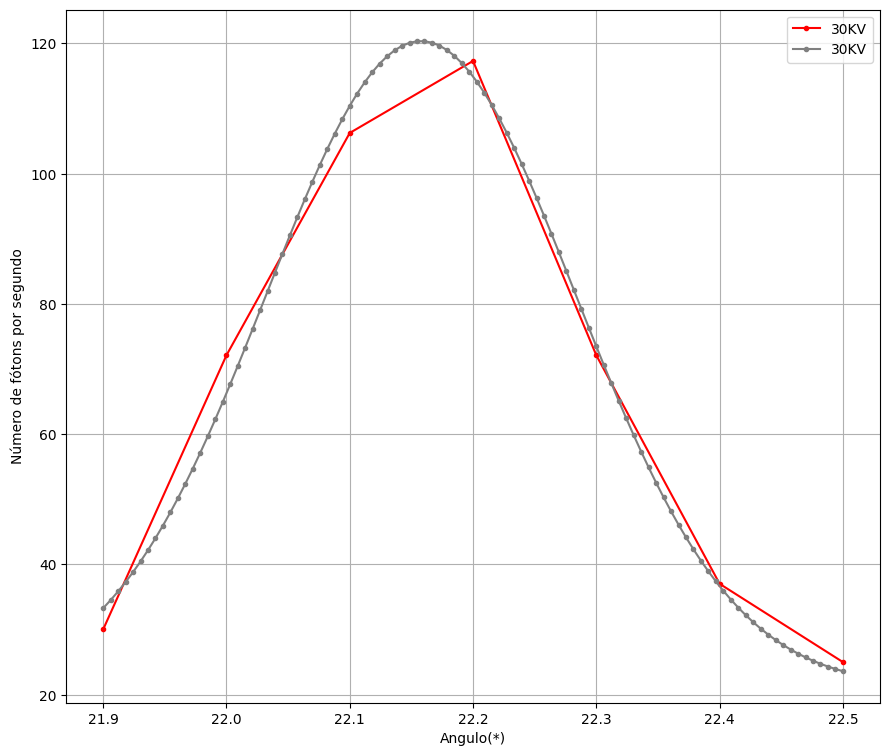

Para o pico Beta : 
 a =  0.030853901536352778 
 b =  19.54259581930184 
 N =  33.943417248042074 
 c =  17.388944526945874 
 Matriz de covariancia : 
 [[ 3.74964319e-04 -3.06519830e-04  2.60844756e-02 -8.43626628e-02]
 [-3.06519830e-04  1.38781695e-03  3.44326710e-02  9.59387489e-03]
 [ 2.60844756e-02  3.44326710e-02  4.10822379e+01 -2.37850462e+01]
 [-8.43626628e-02  9.59387489e-03 -2.37850462e+01  3.27515040e+01]] 
 Ajuste do pico beta já considerando incertezas :


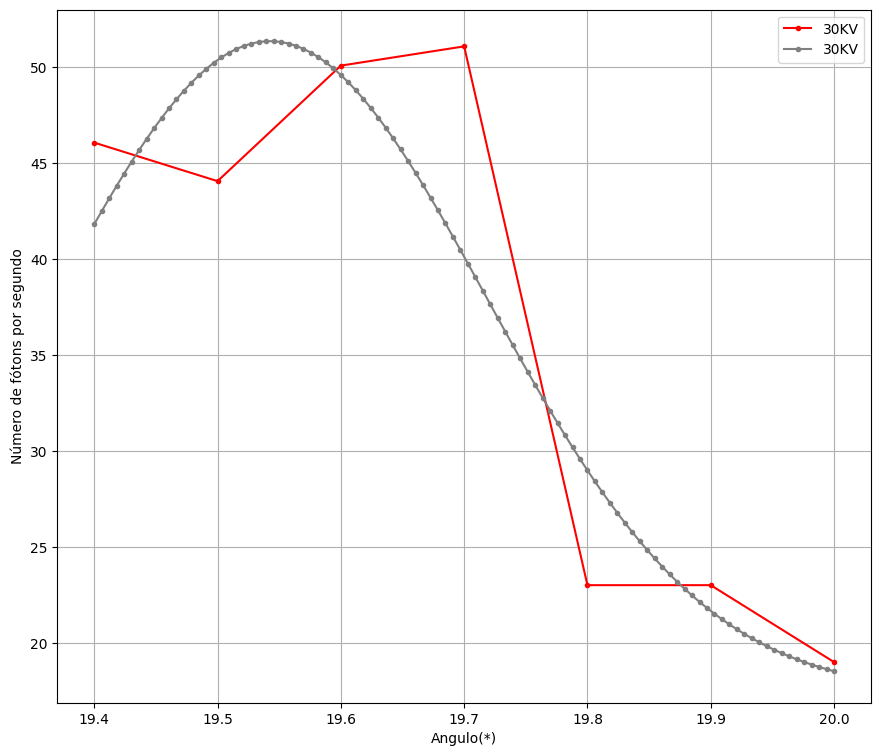

Razão [2.3449303576234106, 0.4489083867246776]


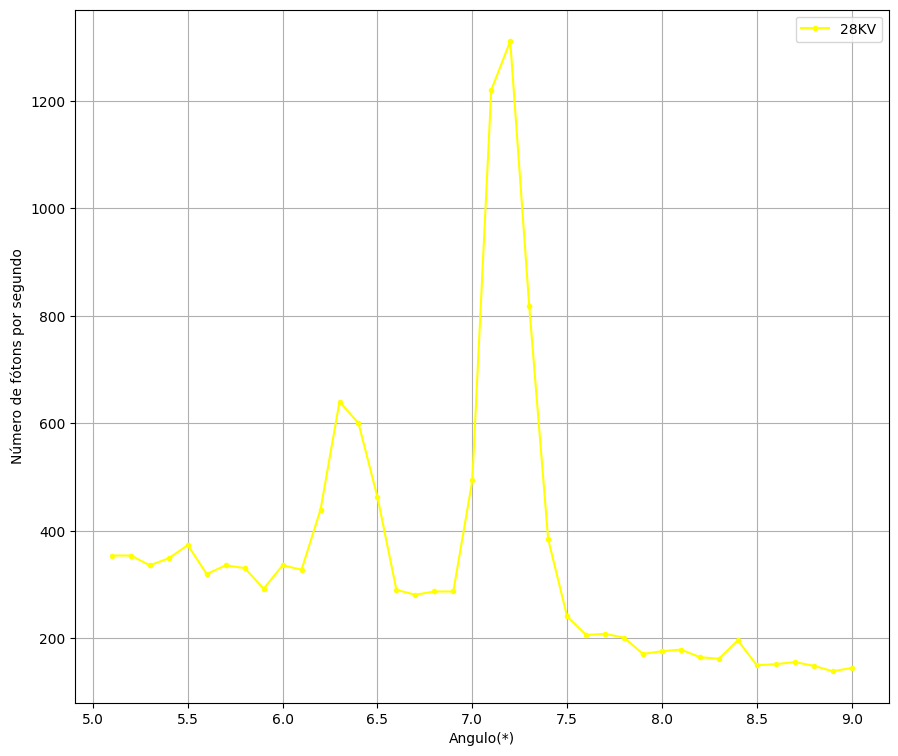

Para o pico alfa : 
 a =  0.01147770870424595 
 b =  7.174452068254978 
 N =  1150.0563687540825 
 c =  238.27185947565997 
 Matriz de covariancia : 
 [[ 9.29330639e-07 -5.13765020e-08 -7.58059309e-03 -1.36688973e-02]
 [-5.13765020e-08  1.22611024e-05 -5.63691394e-03  2.00438202e-03]
 [-7.58059309e-03 -5.63691394e-03  1.43813250e+03 -1.48731547e+02]
 [-1.36688973e-02  2.00438202e-03 -1.48731547e+02  3.54085772e+02]] 
 Ajuste do pico alfa já considerando incertezas :


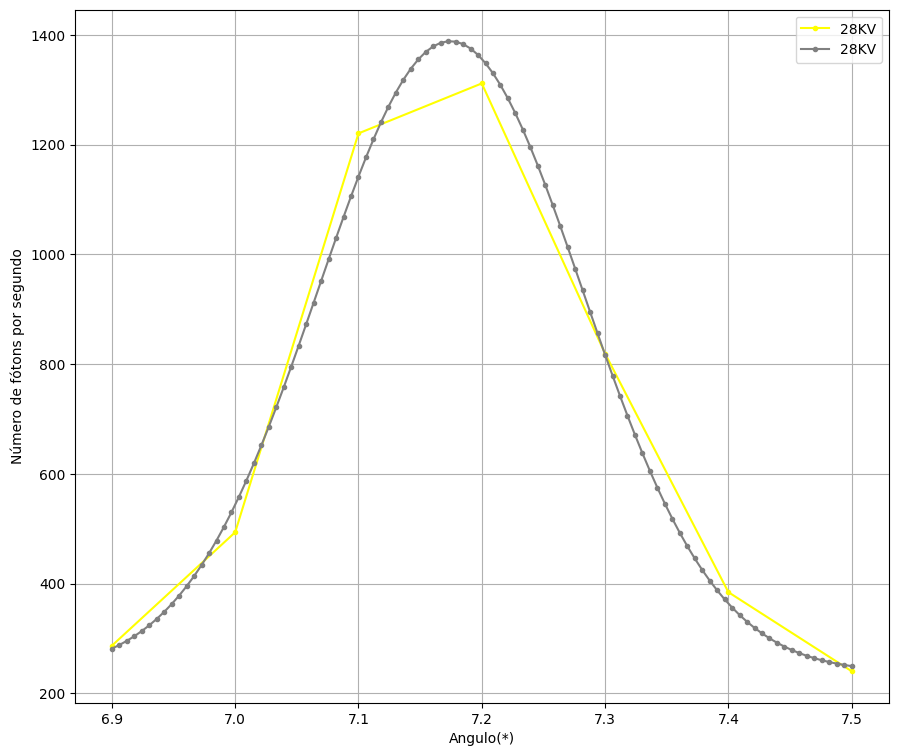

Para o pico Beta : 
 a =  0.011737036027336924 
 b =  6.346116127931761 
 N =  360.5312211663511 
 c =  299.99999999999994 
 Matriz de covariancia : 
 [[ 4.88688898e-06  2.82550850e-07 -2.95099826e-03 -2.67616225e-02]
 [ 2.82550850e-07  5.22765474e-05 -2.35500137e-03 -2.03984141e-04]
 [-2.95099826e-03 -2.35500137e-03  6.08964040e+02 -1.59179402e+02]
 [-2.67616225e-02 -2.03984141e-04 -1.59179402e+02  2.61047341e+02]] 
 Ajuste do pico beta já considerando incertezas :


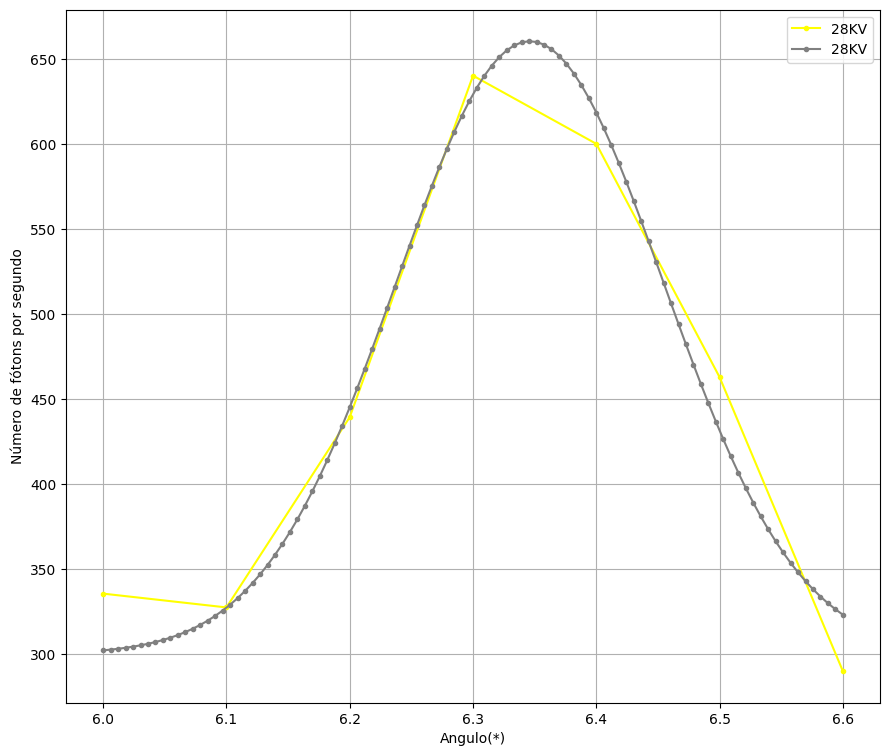

Razão [2.1018358916907274, 0.11365271265577259]


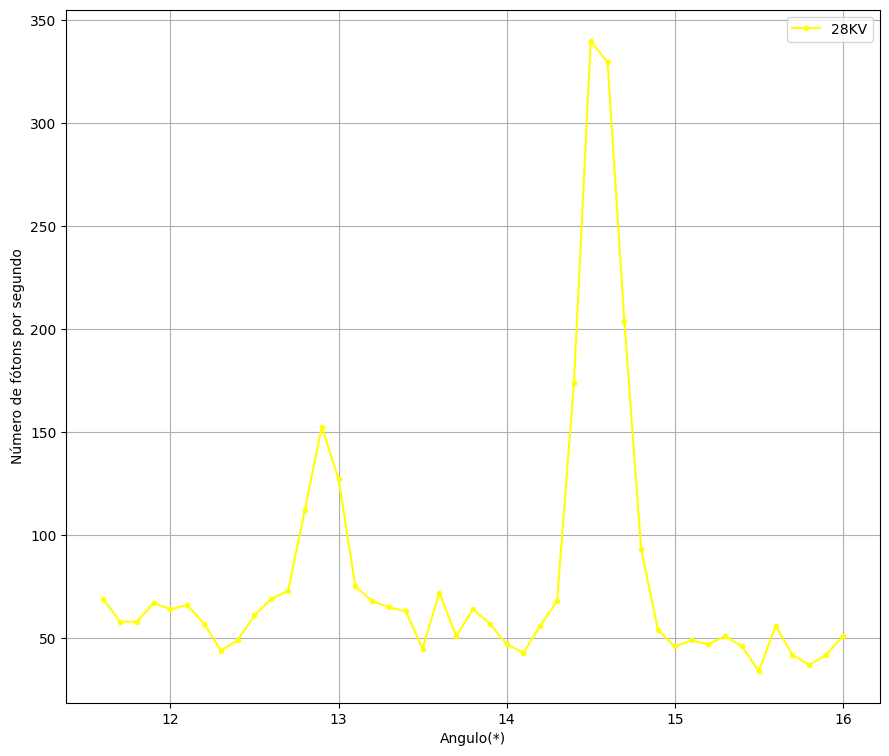

Para o pico alfa : 
 a =  0.013465848034982375 
 b =  14.55958355014235 
 N =  312.3532849552432 
 c =  50.85073250033922 
 Matriz de covariancia : 
 [[ 2.69097427e-06 -1.28015101e-07 -5.55724694e-03 -9.40307329e-03]
 [-1.28015101e-07  3.13722537e-05 -5.80763805e-03  3.70685069e-03]
 [-5.55724694e-03 -5.80763805e-03  2.51210127e+02 -3.08451249e+01]
 [-9.40307329e-03  3.70685069e-03 -3.08451249e+01  6.25236145e+01]] 
 Ajuste do pico alfa já considerando incertezas :


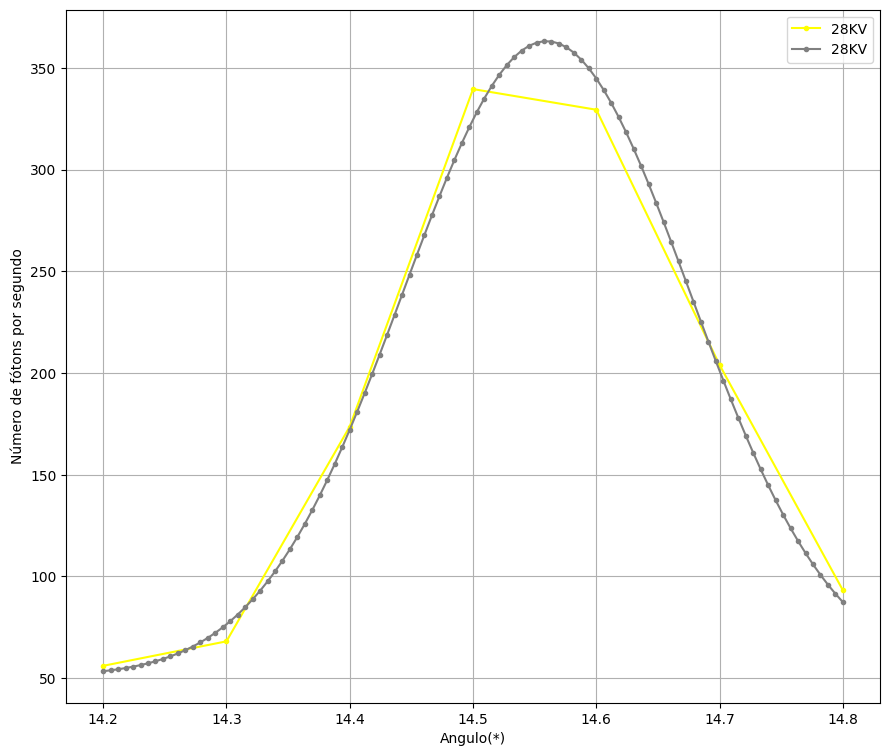

Para o pico Beta : 
 a =  0.008693856545566333 
 b =  12.911508746362697 
 N =  89.01675716989557 
 c =  67.02798488876422 
 Matriz de covariancia : 
 [[ 8.20550506e-06 -1.09932520e-07 -7.74339857e-03 -1.12741642e-02]
 [-1.09932520e-07  1.54930696e-04  1.30668666e-03 -1.94711539e-04]
 [-7.74339857e-03  1.30668666e-03  1.40797438e+02 -2.07365123e+01]
 [-1.12741642e-02 -1.94711539e-04 -2.07365123e+01  3.57150700e+01]] 
 Ajuste do pico beta já considerando incertezas :


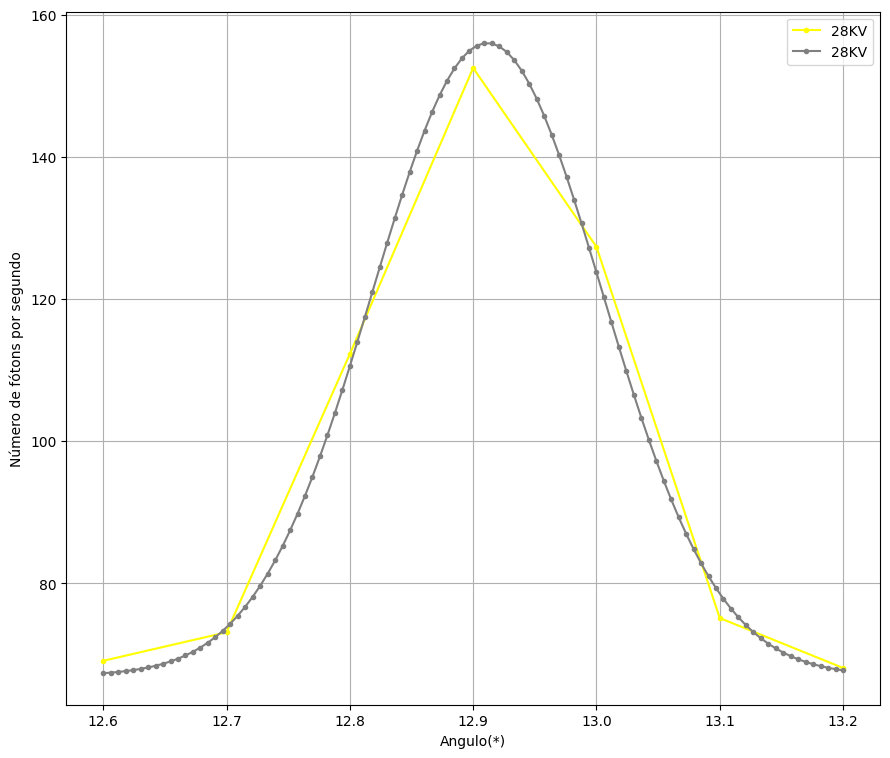

Razão [2.327563317186606, 0.22837712055818643]


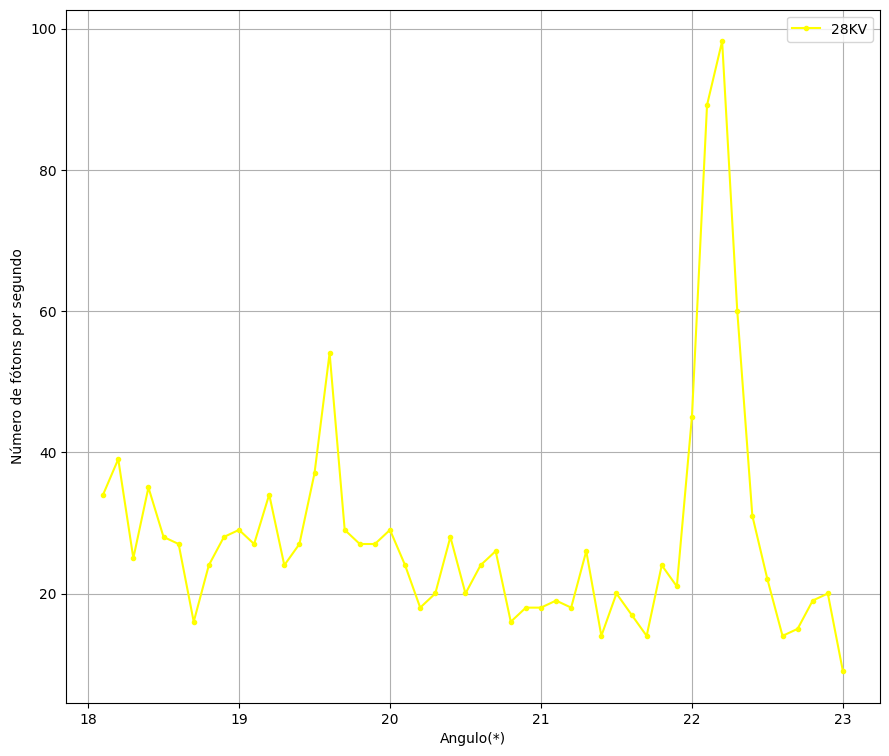

Para o pico alfa : 
 a =  0.012169667501900435 
 b =  22.17073551450926 
 N =  82.91840254613867 
 c =  19.55964272894309 
 Matriz de covariancia : 
 [[ 9.92760573e-06  2.01107767e-07 -4.99571785e-03 -1.10341795e-02]
 [ 2.01107767e-07  1.09163908e-04 -1.51230213e-03  1.61480165e-04]
 [-4.99571785e-03 -1.51230213e-03  7.16913954e+01 -9.59760833e+00]
 [-1.10341795e-02  1.61480165e-04 -9.59760833e+00  2.11577321e+01]] 
 Ajuste do pico alfa já considerando incertezas :


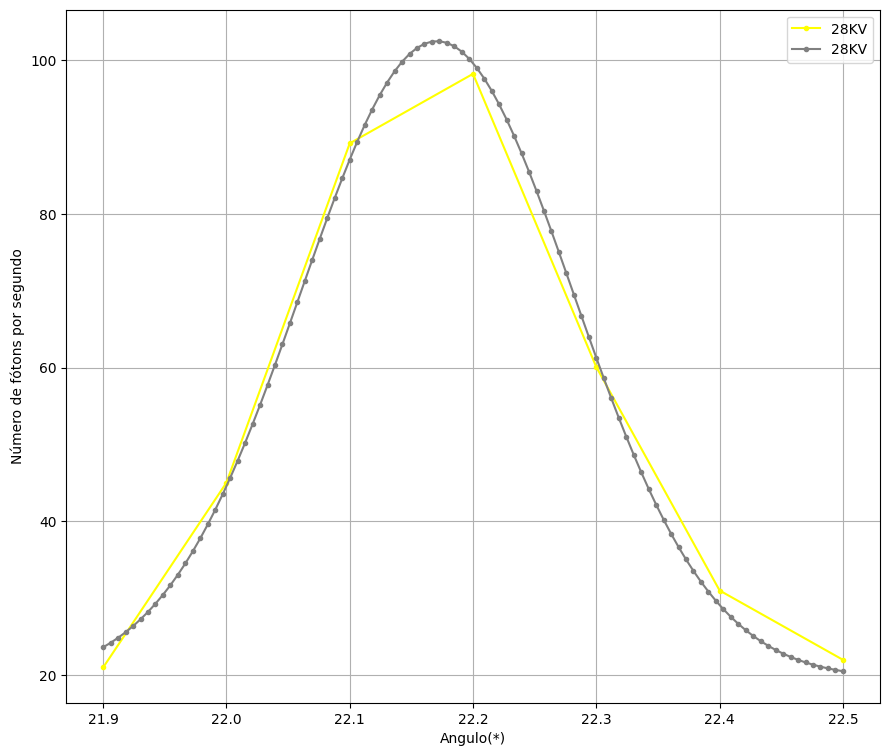

Para o pico Beta : 
 a =  0.0031401343337360706 
 b =  19.579383137149932 
 N =  29.858528578453225 
 c =  26.13325673998706 
 Matriz de covariancia : 
 [[ 4.89846310e-06  2.67443264e-05 -9.71020518e-03 -2.67710912e-03]
 [ 2.67443264e-05  4.74806503e-04 -7.14546374e-02 -1.14664624e-02]
 [-9.71020518e-03 -7.14546374e-02  8.29647895e+01 -3.15304856e+00]
 [-2.67710912e-03 -1.14664624e-02 -3.15304856e+00  6.91527125e+00]] 
 Ajuste do pico beta já considerando incertezas :


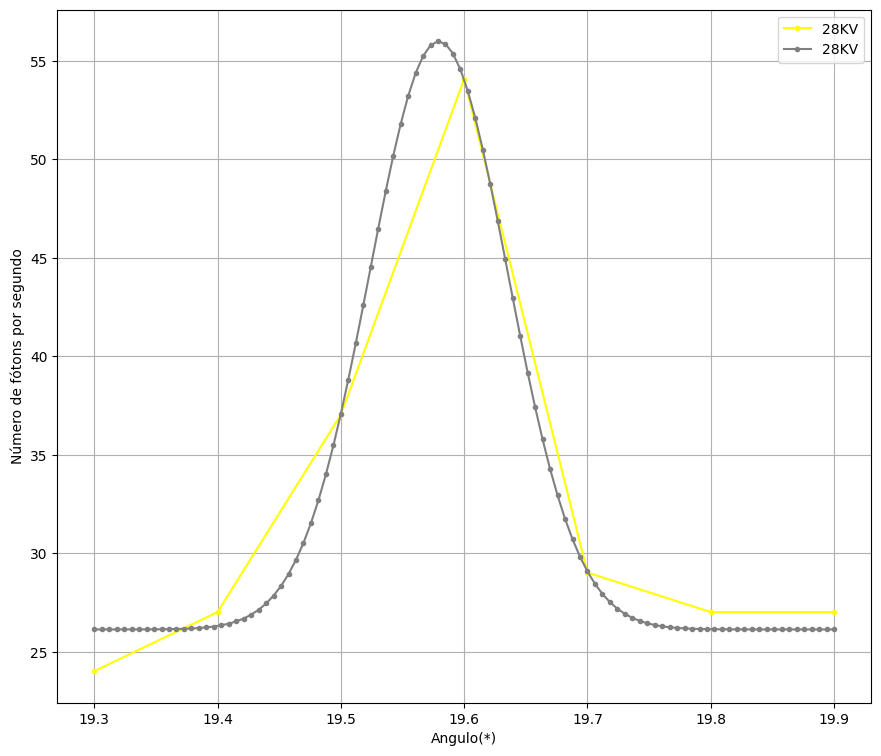

Razão [1.8302335725189267, 0.3544725619003143]


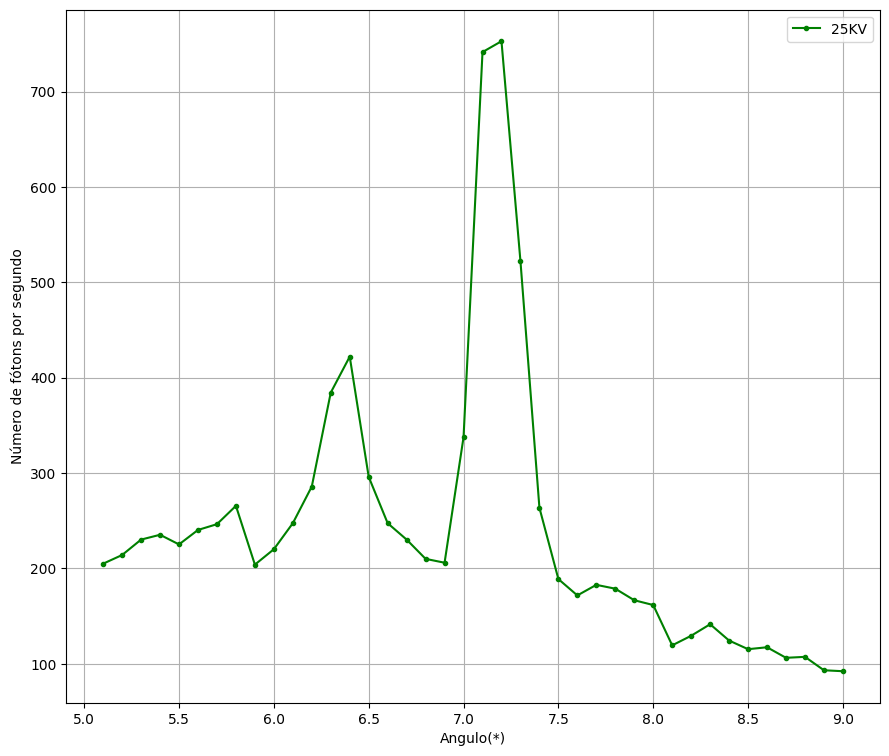

Para o pico alfa : 
 a =  0.01246153474738951 
 b =  7.17347839093552 
 N =  632.4316222949568 
 c =  176.74965376653853 
 Matriz de covariancia : 
 [[ 1.91129352e-06  3.52843980e-08 -3.62420214e-03 -1.67697651e-02]
 [ 3.52843980e-08  2.00382458e-05 -3.77006003e-03  3.67337784e-04]
 [-3.62420214e-03 -3.77006003e-03  6.78630251e+02 -1.26088229e+02]
 [-1.67697651e-02  3.67337784e-04 -1.26088229e+02  2.43345230e+02]] 
 Ajuste do pico alfa já considerando incertezas :


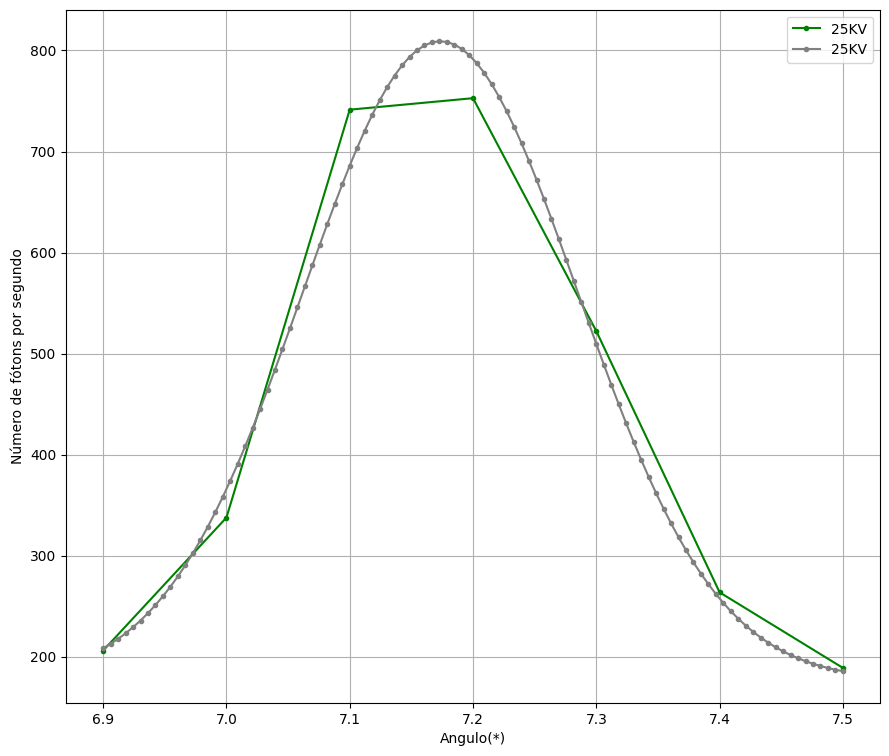

Para o pico Beta : 
 a =  0.008756854332556784 
 b =  6.361770192598256 
 N =  192.11053262568532 
 c =  237.43119311018282 
 Matriz de covariancia : 
 [[ 5.75960246e-06 -2.00244452e-07 -1.01767066e-02 -1.74255789e-02]
 [-2.00244452e-07  1.02339628e-04  2.44353245e-03 -1.51686884e-05]
 [-1.01767066e-02  2.44353245e-03  4.29331421e+02 -7.67051397e+01]
 [-1.74255789e-02 -1.51686884e-05 -7.67051397e+01  1.23914249e+02]] 
 Ajuste do pico beta já considerando incertezas :


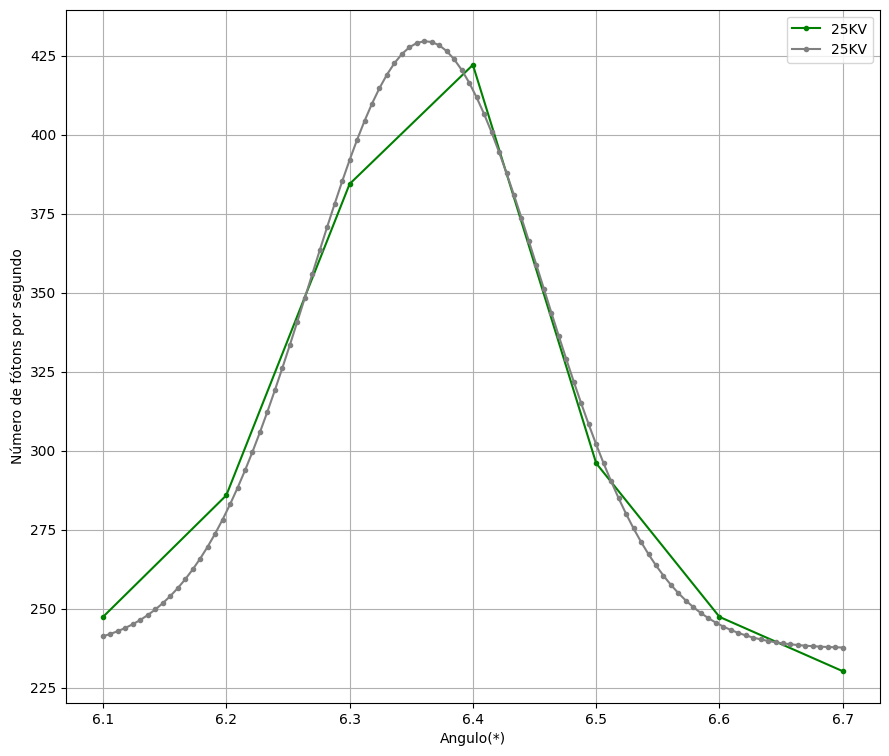

Razão [1.8838246148851985, 0.12505252547688983]


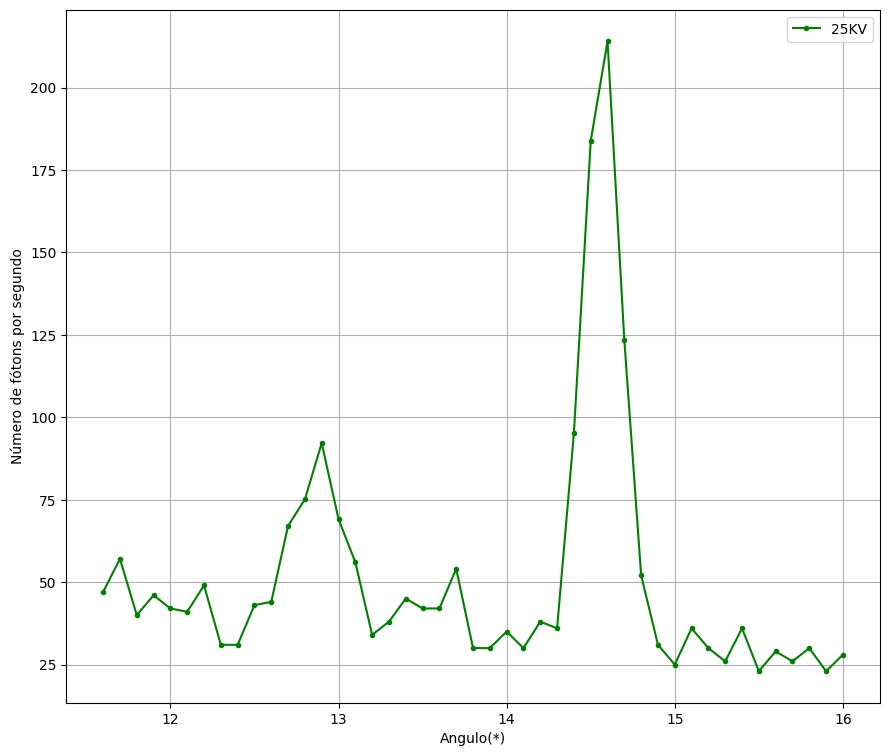

Para o pico alfa : 
 a =  0.013017817716886168 
 b =  14.568522069210701 
 N =  191.8988641743206 
 c =  26.72762830143829 
 Matriz de covariancia : 
 [[ 4.31717734e-06  5.71795307e-09 -4.64310969e-03 -1.05670862e-02]
 [ 5.71795307e-09  4.34048489e-05  1.22847212e-04 -1.33539868e-04]
 [-4.64310969e-03  1.22847212e-04  1.45573467e+02 -1.71297293e+01]
 [-1.05670862e-02 -1.33539868e-04 -1.71297293e+01  4.19560206e+01]] 
 Ajuste do pico alfa já considerando incertezas :


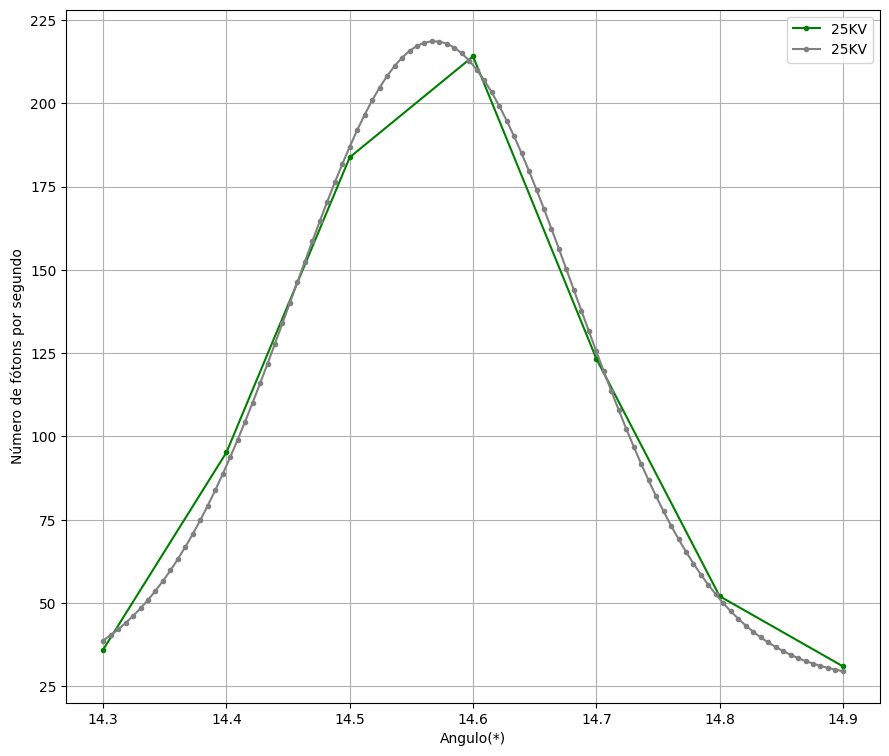

Para o pico Beta : 
 a =  0.05384938702967606 
 b =  12.874235678312559 
 N =  80.28403742378053 
 c =  4.330122305477796 
 Matriz de covariancia : 
 [[ 4.93484822e-03  3.53835528e-04  4.24194581e+00 -4.54312213e+00]
 [ 3.53835528e-04  3.07922326e-04  3.48830143e-01 -3.61468795e-01]
 [ 4.24194581e+00  3.48830143e-01  3.81909682e+03 -4.01893602e+03]
 [-4.54312213e+00 -3.61468795e-01 -4.01893602e+03  4.26568209e+03]] 
 Ajuste do pico beta já considerando incertezas :


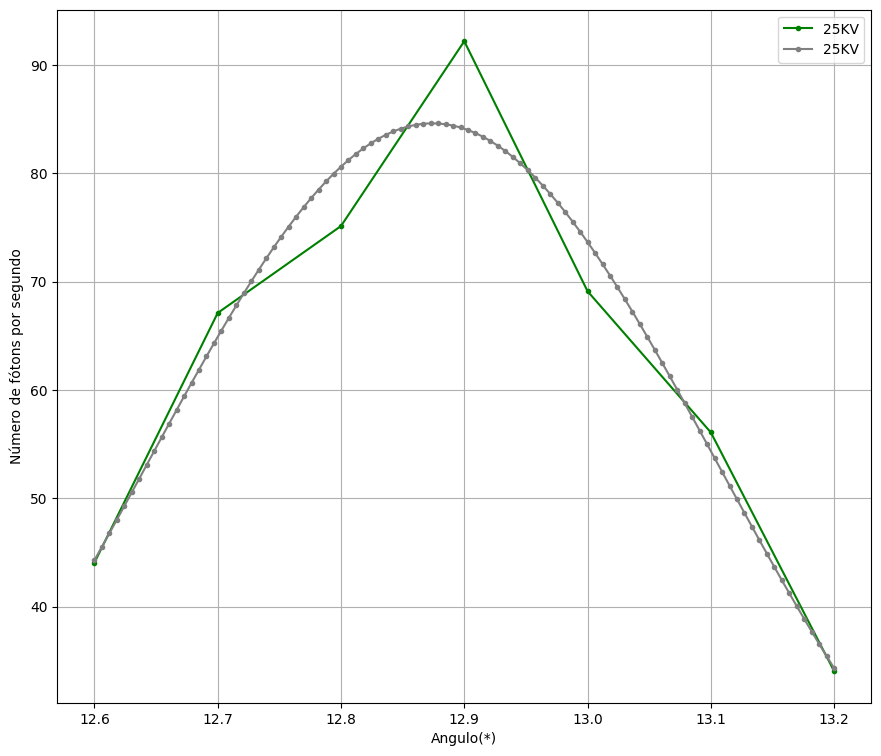

Razão [2.5838050413229015, 2.750451058587871]


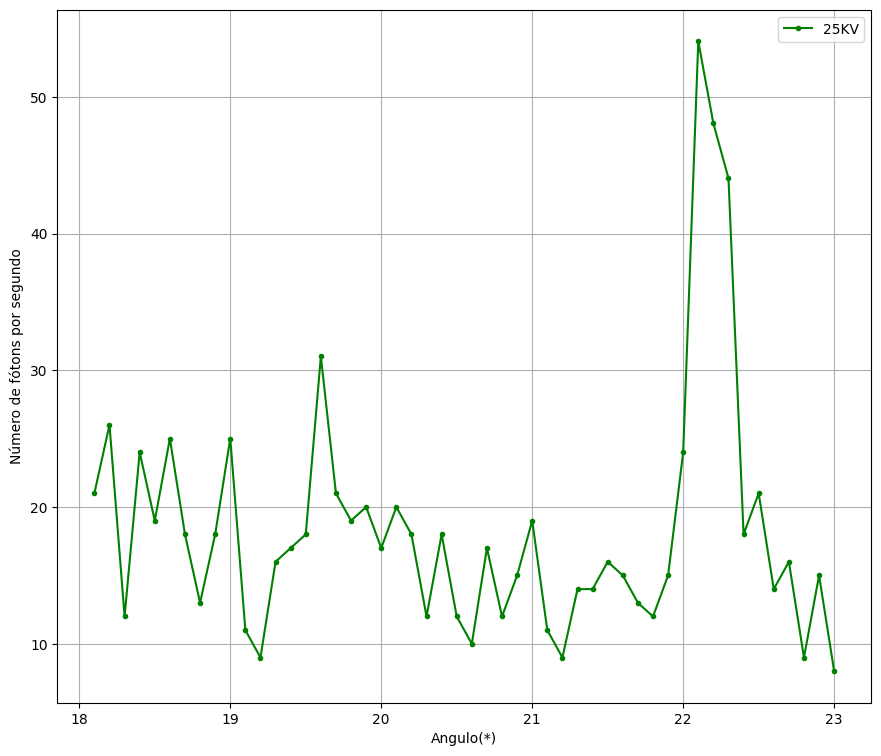

Para o pico alfa : 
 a =  0.01503565787545528 
 b =  22.178363007793855 
 N =  44.13893962309978 
 c =  11.158964886263623 
 Matriz de covariancia : 
 [[ 2.38430479e-05 -9.40278673e-07 -3.13152965e-03 -1.25899552e-02]
 [-9.40278673e-07  2.37802772e-04 -5.32081689e-03  3.93940282e-03]
 [-3.13152965e-03 -5.32081689e-03  3.71531105e+01 -7.93714934e+00]
 [-1.25899552e-02  3.93940282e-03 -7.93714934e+00  1.24522697e+01]] 
 Ajuste do pico alfa já considerando incertezas :


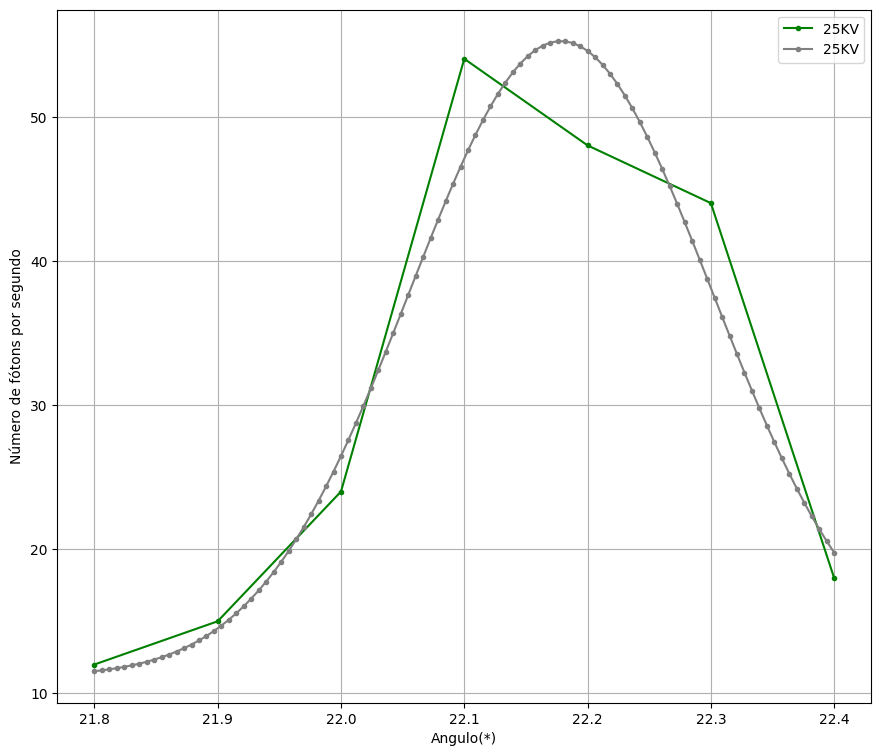

Para o pico Beta : 
 a =  0.0017082286703624027 
 b =  19.625570648432387 
 N =  15.931664668414651 
 c =  17.864551766852838 
 Matriz de covariancia : 
 [[ 7.90442959e-05 -1.08209550e-03 -3.90330296e-01 -8.66911889e-03]
 [-1.08209550e-03  1.55359324e-02  5.48409466e+00  1.05306802e-01]
 [-3.90330296e-01  5.48409466e+00  2.00467729e+03  3.51324904e+01]
 [-8.66911889e-03  1.05306802e-01  3.51324904e+01  4.50852546e+00]] 
 Ajuste do pico beta já considerando incertezas :


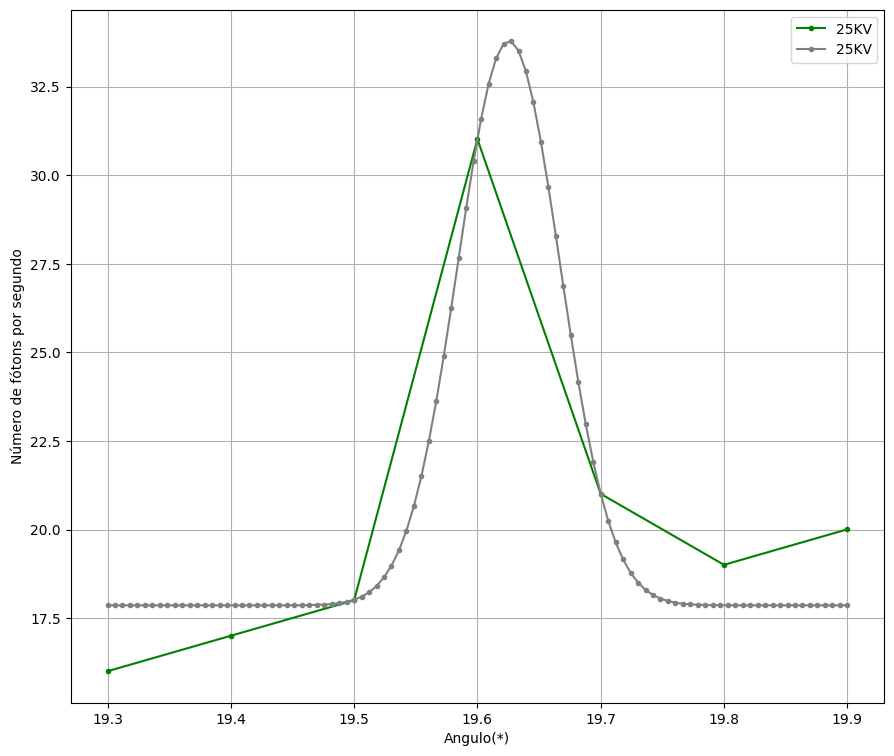

Razão [1.636215835440626, 2.18009754542924]


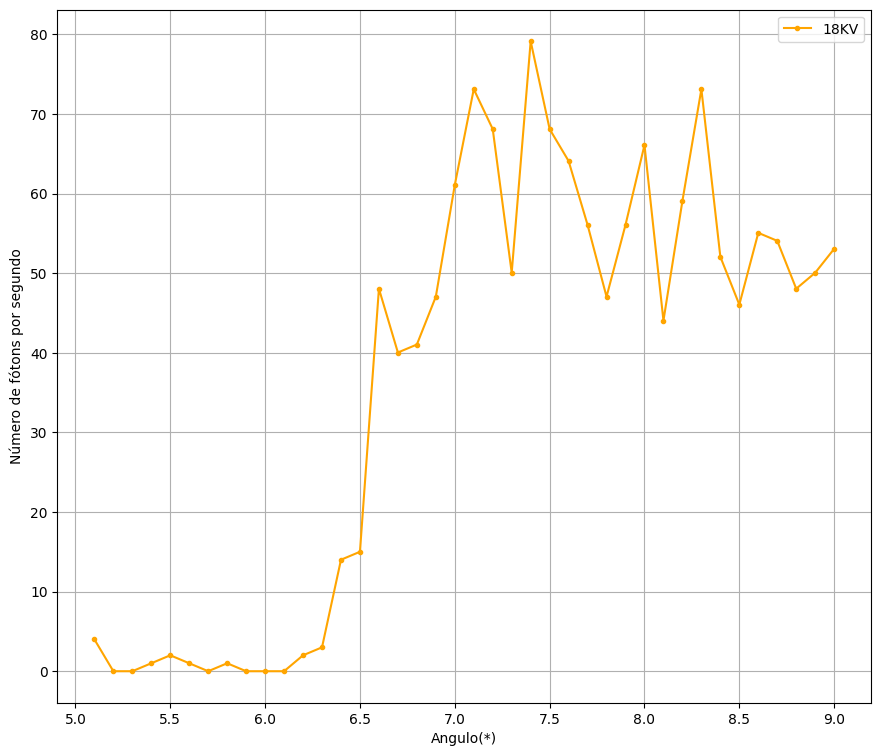

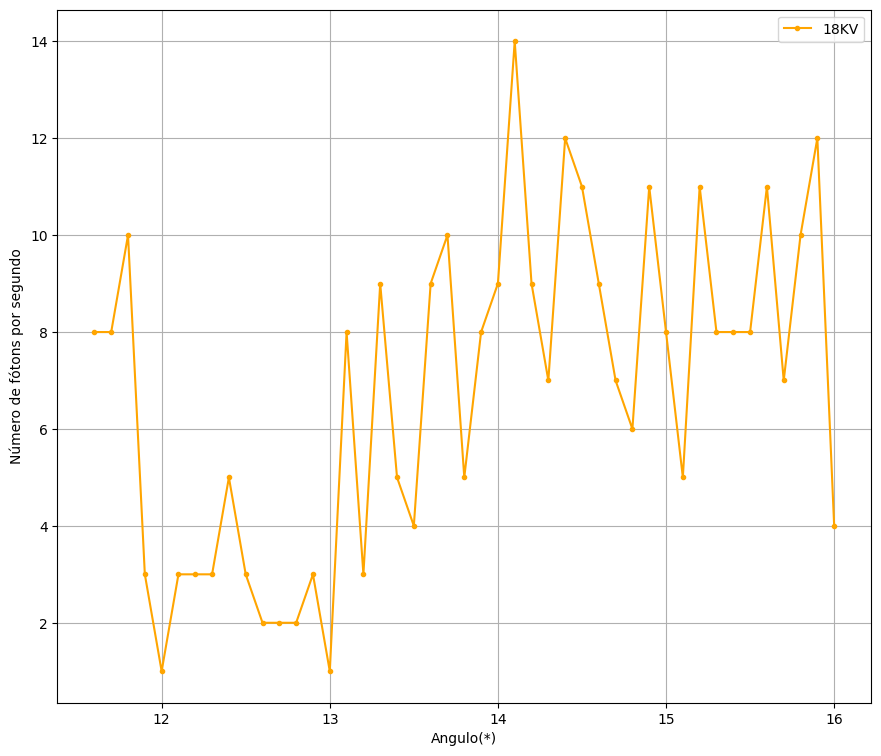

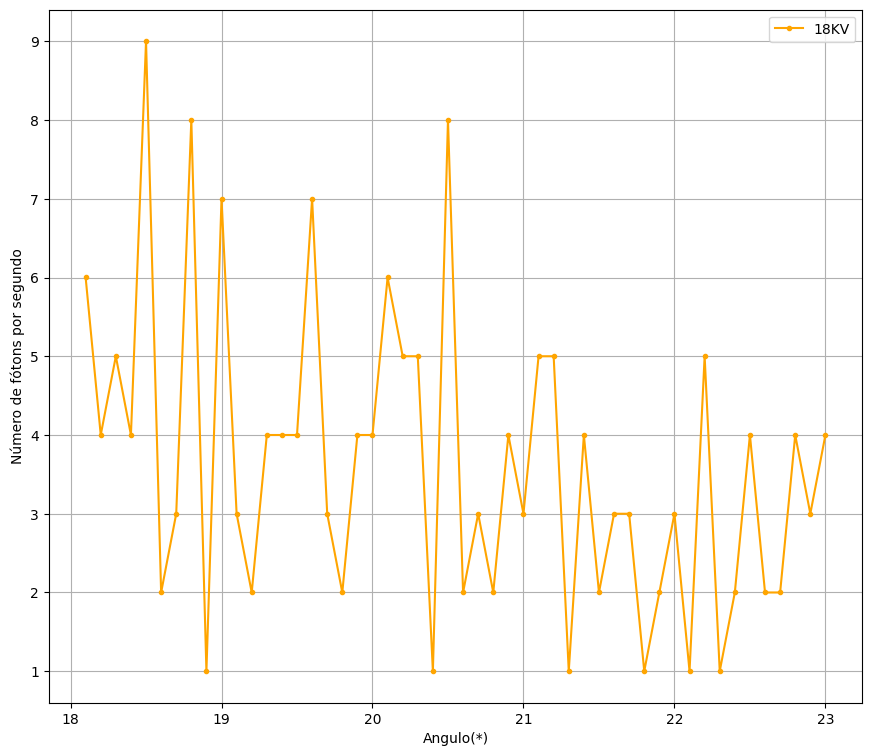

In [32]:
cores = ['Blue', 'Red', 'Yellow', 'Green', 'Orange']
voltagens =['35KV', '30KV', '28KV', '25KV', '18KV']
grafs = ['B', 'C', 'D', 'E', 'F']
def AnalisePicos(cor, voltagem, graf):
    
    def gauss(x, a, b, N, c):
        return c + N*np.exp((-(x-b)**2/(2*a)))


    for w in range(3):
        selecANG =[]
        selecTaxaMedidaNF = []
        for i in range(0, 275):
            if df['A'][i] >= 5.01 + 6.5*w  and df['A'][i] <= 9 + 7*w :
                selecANG.append(df['A'][i])
                selecTaxaMedidaNF.append(df[graf][i])
        
        selecNF = []
        for i in range(len(selecTaxaMedidaNF)):
            selecNF = selecNF + [selecTaxaMedidaNF[i]/(1-TempoMorto*selecTaxaMedidaNF[i])]

        plt.figure    (figsize=(10.5, 9))
        plt.plot(selecANG, selecNF, label=voltagem, marker='.', color=cor )
        plt.xlabel('Angulo(*)')
        plt.ylabel('Número de fótons por segundo')
        plt.grid()
        plt.legend()
        plt.show()
        
        
        if cor != 'Orange':
            
            #calculo dos I_alfa e I_beta
            ListaOrdenadasPico1 = [] #lista das ordenadas dos pontos proximos ao pico 1
            ListaAbsPico1 = [] #lista das abissiças dos pontos proximos ao pico 1
            Npico1 = 0 #Posição (ou indice) das coordenadas do pico 1 nas lista selecANG e selecNF
            
            ListaOrdenadasPico2 = [] #lista das ordenadas dos pontos proximos ao pico 2
            ListaAbsPico2 = [] #lista das abissiças dos pontos proximos ao pico 2
            
            selecNFtiraPico1 = copy.deepcopy(selecNF)
            selecANGtiraPico1 = copy.deepcopy(selecANG)
            
            
            "Dangulo = 0.005"
            
            for i in range(len(selecNF)):
                if selecNF[i]==max(selecNF):
                    Npico1 = i
            for i in range(7):
                ListaOrdenadasPico1 = ListaOrdenadasPico1 + [selecNF[Npico1-3+i]]
                ListaAbsPico1 = ListaAbsPico1 + [selecANG[Npico1-3+i]]
                del selecNFtiraPico1[Npico1-3]
                del selecANGtiraPico1[Npico1-3]


            for i in range(len(selecNFtiraPico1)):
                if selecNFtiraPico1[i]==max(selecNFtiraPico1):
                    Npico2 = i
            for i in range(7):
                ListaOrdenadasPico2 = ListaOrdenadasPico2 + [selecNFtiraPico1[Npico2-3+i]]
                ListaAbsPico2 = ListaAbsPico2 + [selecANGtiraPico1[Npico2-3+i]]

            #def LigaGrafico(x, x1, y1, x2, y2):
                #return(x*(y1-y2)/(x1-x2) + (x1*y2-x2*y1)/(x1-x2))



            #Calculo das incertezas:
            ListaSigmaOrdPico1 = []
            ListaSigmaOrdPico2 = []
            
            for i in range(len(ListaOrdenadasPico1)):
                TaxaMedidaPico1 = ListaOrdenadasPico1[i]/(ListaOrdenadasPico1[i]*TempoMorto + 1)
                if len(ListaOrdenadasPico2)-1 > i > 0:
                    dF1dx = (ListaOrdenadasPico1[i+1] - ListaOrdenadasPico1[i-1])/0.2
                elif i == 0:
                    dF1dx = (ListaOrdenadasPico1[1] - selecNF[Npico1-4])/0.2
                else:
                    dF2dx = (selecNF[Npico1+4] - ListaOrdenadasPico1[i-1])/0.2
                ListaSigmaOrdPico1 = ListaSigmaOrdPico1 + [((TaxaMedidaPico1**(1/2)/(TaxaMedidaPico1*TempoMorto-1)**2)**2 + (SigmaTMorto*TaxaMedidaPico1**2/(TempoMorto*TaxaMedidaPico1-1)**2)**2 + (dF1dx*0.005)**2)**(1/2)]
            
            for i in range(len(ListaOrdenadasPico2)):
                TaxaMedidaPico2 = ListaOrdenadasPico2[i]/(ListaOrdenadasPico2[i]*TempoMorto + 1)
                if len(ListaOrdenadasPico2)-1 > i > 0:
                    dF2dx = (ListaOrdenadasPico2[i+1] - ListaOrdenadasPico2[i-1])/0.2
                elif i == 0:
                    dF2dx = (ListaOrdenadasPico2[1] - selecNF[Npico2-4])/0.2
                else:
                    dF2dx = (selecNF[Npico2+4] - ListaOrdenadasPico2[i-1])/0.2
                ListaSigmaOrdPico2 = ListaSigmaOrdPico2 + [((TaxaMedidaPico2**(1/2)/(TaxaMedidaPico2*TempoMorto-1)**2)**2 + (SigmaTMorto*TaxaMedidaPico2**2/(TempoMorto*TaxaMedidaPico2-1)**2)**2 + (dF2dx*0.005)**2)**(1/2)]
                

            poptP1, pcovP1 = curve_fit(gauss, ListaAbsPico1, ListaOrdenadasPico1, bounds=([0, ListaAbsPico1[1], 0, 0], [10, ListaAbsPico1[5], 3000, 300]), sigma=ListaSigmaOrdPico1, absolute_sigma=True) #a, b, N, c
            poptP2, pcovP2 = curve_fit(gauss, ListaAbsPico2, ListaOrdenadasPico2, bounds=([0, ListaAbsPico2[1], 0, 0], [10, ListaAbsPico2[5], 1500, 300]), sigma=ListaSigmaOrdPico2, absolute_sigma=True) #a, b, N, c
            
            print('Para o pico alfa : \n','a = ', poptP1[0], '\n','b = ', poptP1[1], '\n', 'N = ', poptP1[2], '\n', 'c = ', poptP1[3], '\n', 'Matriz de covariancia : \n', pcovP1, '\n', 'Ajuste do pico alfa já considerando incertezas :' )#a, b, N, c
            
            #poptP1 é a lista dos valores dos parametros ajustados do pico 1
            #pcovP1 é a matriz de covariancia. As incertezas são as raizesdos elementos da diagonal principal
            
            rgBL = np.linspace(ListaAbsPico1[0], ListaAbsPico1[6], num = 100) #rgBL é um range continuo (100 pontos) entre 6.9 e 7.5

            plt.figure(figsize=(10.5, 9))
            plt.plot(ListaAbsPico1, ListaOrdenadasPico1, label=voltagem, marker='.', color=cor )
            plt.plot(rgBL, gauss(rgBL, *poptP1), label=voltagem, marker='.', color='gray' )
            plt.xlabel('Angulo(*)')
            plt.ylabel('Número de fótons por segundo')
            plt.grid()
            plt.legend()
            plt.show()
            
            
            
            print('Para o pico Beta : \n','a = ', poptP2[0], '\n','b = ', poptP2[1], '\n', 'N = ', poptP2[2], '\n', 'c = ', poptP2[3], '\n', 'Matriz de covariancia : \n', pcovP2, '\n', 'Ajuste do pico beta já considerando incertezas :' )
            
            #poptP1 é a lista dos valores dos parametros ajustados do pico 1
            #pcovP1 é a matriz de covariancia. As incertezas são as raizesdos elementos da diagonal principal
            
            rgBL = np.linspace(ListaAbsPico2[0], ListaAbsPico2[6], num = 100) #rgBL é um range continuo (100 pontos) entre 6.9 e 7.5

            plt.figure(figsize=(10.5, 9))
            plt.plot(ListaAbsPico2, ListaOrdenadasPico2, label=voltagem, marker='.', color=cor )
            plt.plot(rgBL, gauss(rgBL, *poptP2), label=voltagem, marker='.', color='gray' )
            plt.xlabel('Angulo(*)')
            plt.ylabel('Número de fótons por segundo')
            plt.grid()
            plt.legend()
            plt.show()

            
            RazãoIKaIKb = [(poptP1[2]+poptP1[3])/(poptP2[2]+poptP2[3]), ((1/(poptP2[2]+poptP2[3]) * pcovP1[2][2]**(1/2))**2 + (1/(poptP2[2]+poptP2[3]) * pcovP1[3][3]**(1/2))**2 + ((poptP1[2]+poptP1[3])/(poptP2[2]+poptP2[3])**2 * pcovP2[2][2]**(1/2))**2 + ((poptP1[2]+poptP1[3])/(poptP2[2]+poptP2[3])**2 * pcovP2[3][3]**(1/2))**2)**(1/2)]
            print('Razão', RazãoIKaIKb)
            # Ajuste primitivo
    




for j in range(0, 5):
    AnalisePicos(cor=cores[j], voltagem=voltagens[j], graf=grafs[j])
    



## Cálculo da <font color='#7ac77a'>constante de Planck</font> 
--------------------------------------------
Para isso vamos fazer o seguinte procedimento: 
- 1) vamos pegar os primeiros valores do gráfico de angulos
- 2) passar os dádos para comprimento de onda
- 3) ajusta-los com a função do Breinstrung que vamos obter do multiplot 
- 4) usar essa relação para achar h
----------------------

[3.0861934677328273, 3.637509017597369, 3.9787922741806225, 4.4496275810456325] [0.4149832805111679, 0.5962415195213949, 0.6238478966175058, 0.8210637565363027]
Comprimento de onda para 35000 É igual a :  3.0364741747870376e-11
Comprimento de onda para 30000 É igual a :  3.578234271943244e-11
Comprimento de onda para 28000 É igual a :  3.9134395455725797e-11
Comprimento de onda para 25000 É igual a :  4.375659267565026e-11


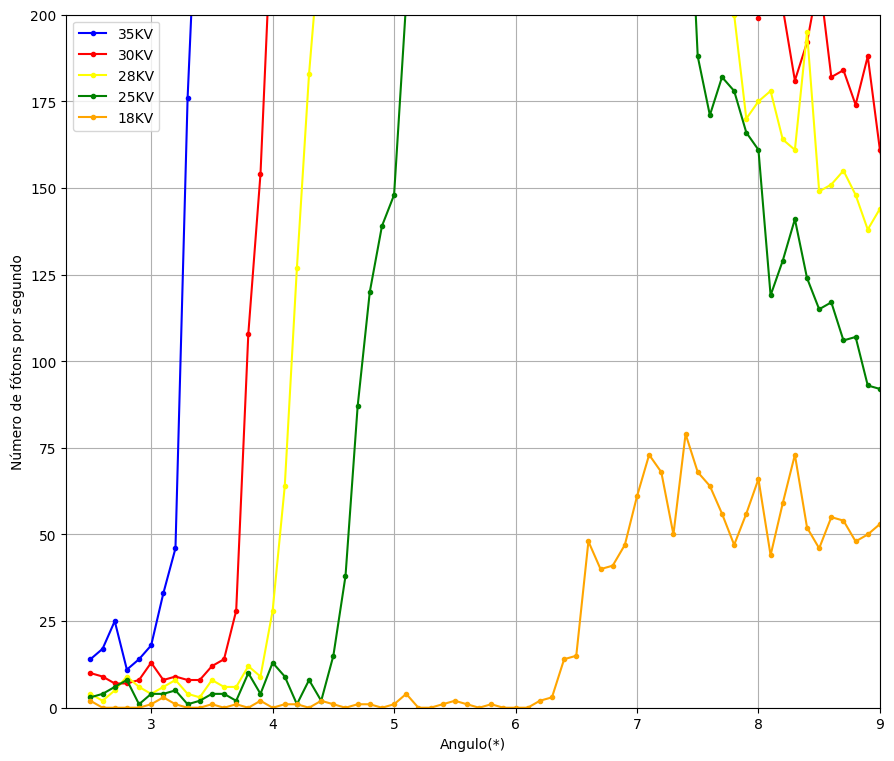

a = 1.0787318458761668e-06  
 Incerteza do parâmetro a : 
 1.196188058495144e-07
h = 5.765051493772013e-34  
 Incerteza de h : 
 6.392771085624659e-35


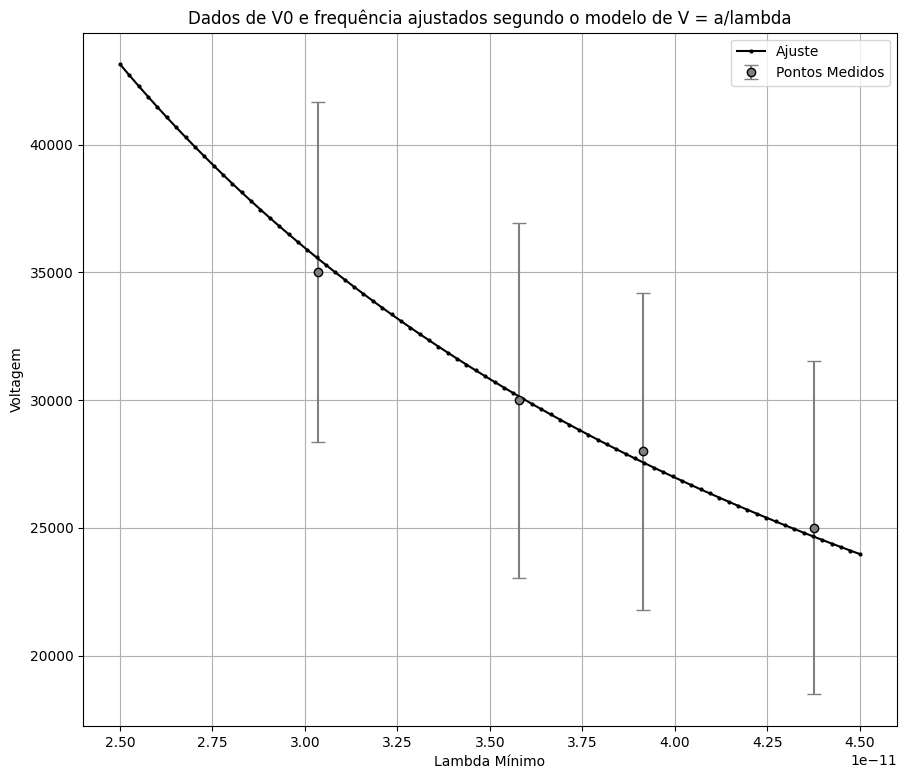

[3.0364741747870376e-11, 3.578234271943244e-11, 3.9134395455725797e-11, 4.375659267565026e-11]
[35000, 30000, 28000, 25000]
[350, 300, 280, 250]
[6658.417477547314, 6951.44625885263, 6205.034503959743, 6515.591013849154]
1.0787318458761668e-06
[1.43086587e-14]


In [33]:
def Linear(x, a, b):
    return(a*x+b)

AngsMin = []
SigmaAngsMin = []

Angulos = []
Contagens = []



for i in range(4):
    for j in range(275):
        Angulos = Angulos + [df['A'][j]]
        Contagens = Contagens + [df[grafs[i]][j]]
    
    Contagens = df[grafs[i]]
    for j in range(50):
        if Contagens[j] >= 30:
            InicioDoAjuste = j
            break
    SelecAngLinear = []
    SelecNFLinear = []
    SigmaSelecAngLinear = []
    SigmaSelecNFLinear = []
    
    for k in range(5):
        
        SelecAngLinear.append(Angulos[InicioDoAjuste + k])
        #SelecAngLinear = SelecAngLinear + [Angulos[InicioDoAjuste + k]]
        SelecNFLinear = SelecNFLinear + [Contagens[InicioDoAjuste + k]]
        SigmaSelecNFLinear = SigmaSelecNFLinear + [((Contagens[InicioDoAjuste + k]) + (((Contagens[InicioDoAjuste + 1] - Contagens[InicioDoAjuste])/0.1)*0.005)**2)**(1/2)]
    poptLb, pcovLb = curve_fit(Linear, SelecAngLinear, SelecNFLinear, sigma=SigmaSelecNFLinear, absolute_sigma=True)
    
    AngsMin = AngsMin + [-poptLb[1]/poptLb[0]]
    SigmaAngsMin = SigmaAngsMin + [((pcovLb[0][0]**(1/2)*poptLb[1]/poptLb[0]**2)**2 + (pcovLb[1][1]**(1/2)/poptLb[0]))**(1/2)]
    
        
print(AngsMin, SigmaAngsMin)

# Zoom no inicio do multiplot 
def zoom(xlmin, xlmax, ylmin, ylmax):
    plt.figure(figsize=(10.5, 9))
    plt.plot(df['A'], df['B'], label='35KV', marker='.', color='Blue')
    plt.plot(df['A'], df['C'], label='30KV', marker='.', color='Red')
    plt.plot(df['A'], df['D'], label='28KV', marker='.', color='Yellow')
    plt.plot(df['A'], df['E'], label='25KV', marker='.', color='Green')
    plt.plot(df['A'], df['F'], label='18KV', marker='.', color='Orange')
    plt.xlabel('Angulo(*)')
    plt.ylabel('Número de fótons por segundo')
    plt.xlim(xlmin, xlmax)
    plt.ylim(ylmin, ylmax)
    plt.grid()
    plt.legend()
    plt.show()
    
def Tensão(x, a):
    return  a/x

# Achar o Lambda mínimo 
def Bragg(AngMin):
    d = 0.282e-9
    #n = 1 
    # Retorna o lambda mínimo
    return 2*d*math.sin(AngMin)

def hgenerator2():
    e = -1.602176634e-19 # C
    # a = hc/e
    c = 299792458 # m/s
    h = -poptfin[0]*e/c
    sigma_h = -sig_a*e/c
    return h, sigma_h

def sigma_ldmin(theta, delta_theta):
    # Convertendo ângulos para radianos
    theta_rad = np.radians(theta)
    delta_theta_rad = np.radians(delta_theta)
    
    # Calculando a incerteza em lambda_min
    delta_lambda = np.sqrt((2 * 0.282e-9 * np.cos(theta_rad) * delta_theta_rad)**2 + 
                           ((2 * 0.282e-9) * np.cos(theta_rad) * delta_theta_rad)**2)
    
    return delta_lambda    

SigmaLambdasMin = [] 
for i in range(4):
    SigmaLambdasMin = SigmaLambdasMin + [sigma_ldmin(AngsMin[i], SigmaAngsMin[i])]

voltagens = [35000, 30000, 28000, 25000] # V
sigmaV = [350, 300, 280, 250] # Sigma voltz em V
#AngsMin =[3.75, 4.5, 5.25, 5.75]  Teta mínimo da Ivy
lambdas = []

SigmaFin =[]

for i in range(0, len(AngsMin)):
    lamb = Bragg(math.radians(AngsMin[i]))
    lambdas.append(lamb)
    print('Comprimento de onda para', str(voltagens[i]), 'É igual a : ', lamb)
    SigmaFin = SigmaFin + [((sigmaV[i])**2 + (SigmaLambdasMin[i]*voltagens[i]/lambdas[i])**2)**(1/2)]

poptfin, pcovfin = curve_fit(Tensão, lambdas, voltagens, sigma=SigmaFin, absolute_sigma=True)

sig_a = math.sqrt(pcovfin[0][0])

zoom(2.3, 9, 0, 200)
print('a =', poptfin[0], ' \n Incerteza do parâmetro a : \n', sig_a )
h, sigma_h = hgenerator2()
print('h =', h, ' \n Incerteza de h : \n', sigma_h )


dataPlotx = np.linspace(2.5*10**(-11), 4.5*10**(-11), 80)
plt.figure(figsize=(10.5, 9)) # Inputs lambdas, output tensões. Ajuste V = a/lambda
plt.errorbar(lambdas, voltagens, yerr=SigmaFin, fmt = 'o', markerfacecolor = 'gray', markeredgecolor = 'black', ecolor='gray', capsize= 5, label = 'Pontos Medidos')
plt.plot(dataPlotx, Tensão(dataPlotx, *poptfin), marker ='.', label = 'Ajuste', color = 'black', markersize = '4' )
plt.title('Dados de V0 e frequência ajustados segundo o modelo de V = a/lambda')
plt.xlabel('Lambda Mínimo')
plt.ylabel('Voltagem')
plt.legend()
plt.grid()
plt.show()

print(lambdas)
print(voltagens)
print(sigmaV)
print(SigmaFin)
print(poptfin[0])
print((pcovfin[0]))

Análise das Energias de cada pico removendo a energia de fundo de Bremsstrahlung

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


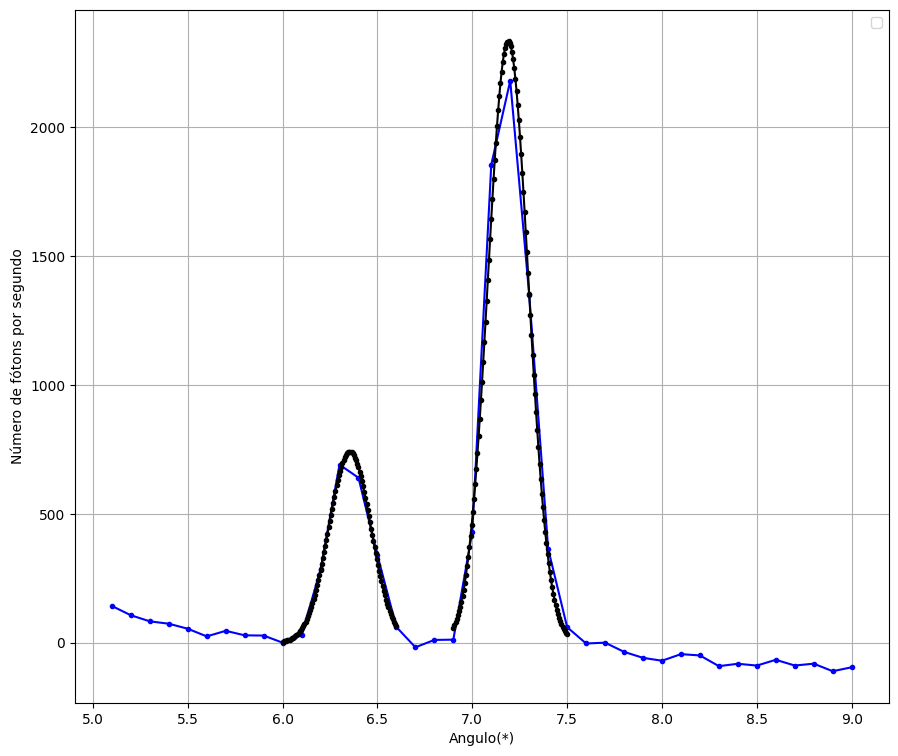

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Energia Ka: 3.894329716049781e-16 
Incerteza Energia Ka: 4.3185010416682663e-17 
Energia Kb: 4.330465320733778e-15 
Incerteza Energia Kb: 4.80378443736975e-16


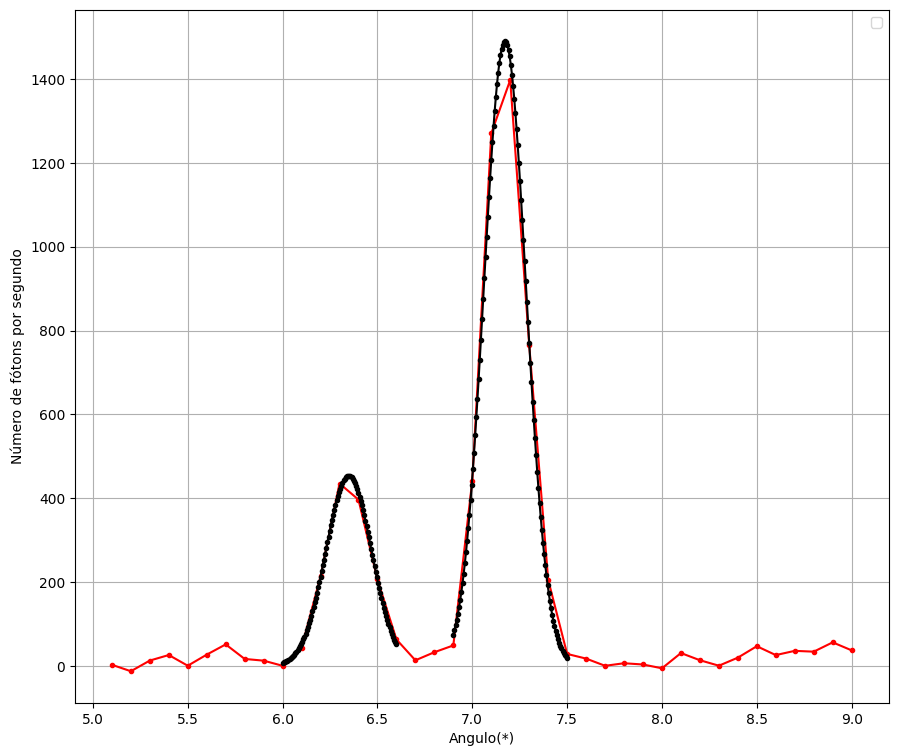

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Energia Ka: 3.946550919147293e-16 
Incerteza Energia Ka: 4.376486518289732e-17 
Energia Kb: 4.72318654764158e-15 
Incerteza Energia Kb: 5.237493494810665e-16


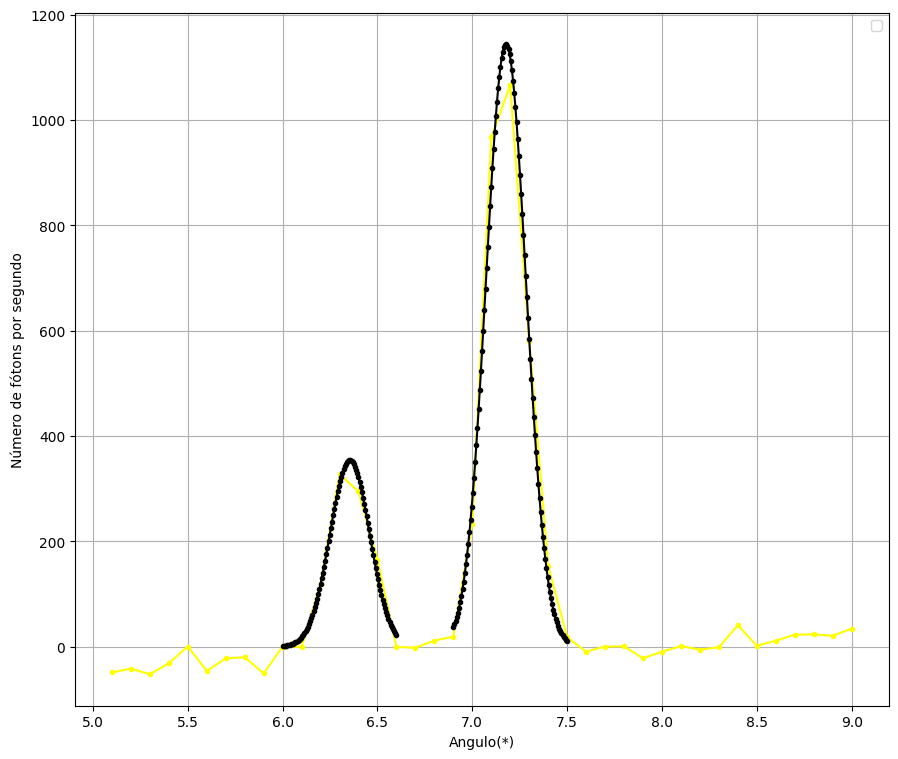

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Energia Ka: 3.9294795557251997e-16 
Incerteza Energia Ka: 4.3909751773705807e-17 
Energia Kb: 4.327036301987531e-15 
Incerteza Energia Kb: 4.798191099041966e-16


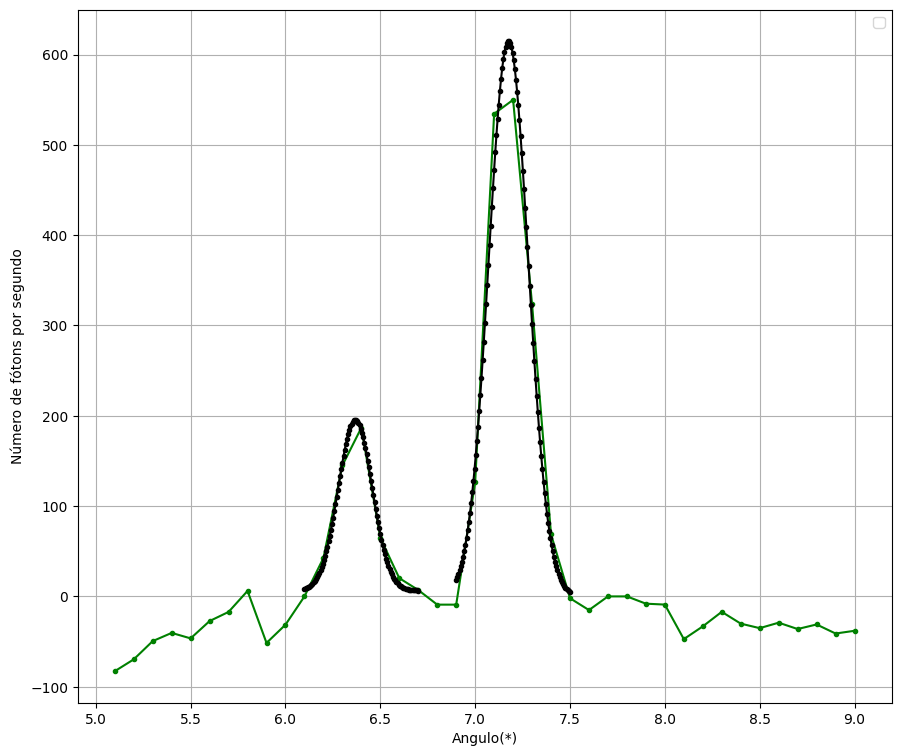

Energia Ka: 3.93589846096376e-16 
Incerteza Energia Ka: 4.368735546256975e-17 
Energia Kb: 3.635024727434561e-15 
Incerteza Energia Kb: 4.03103235228144e-16


In [34]:
cores = ['Blue', 'Red', 'Yellow', 'Green', 'Orange']
voltagens =['35KV', '30KV', '28KV', '25KV', '18KV']
grafs = ['B', 'C', 'D', 'E', 'F']

def AnaliseEnergias(cor, voltagem, graf):

    def gauss(x, a, b, N, c):
            return c + N*np.exp((-(x-b)**2/(2*a)))


    selecANG =[]
    selecTaxaMedidaNF = []
    for i in range(0, 275):
        if df['A'][i] >= 5.01  and df['A'][i] <= 9:
            selecANG.append(df['A'][i])
            selecTaxaMedidaNF.append(df[graf][i])

    selecNF = []
    for i in range(len(selecTaxaMedidaNF)):
        selecNF = selecNF + [selecTaxaMedidaNF[i]/(1-TempoMorto*selecTaxaMedidaNF[i])]


    ListaOrdenadasPico1 = [] #lista das ordenadas dos pontos proximos ao pico 1
    ListaAbsPico1 = [] #lista das abissiças dos pontos proximos ao pico 1
    Npico1 = 0 #Posição (ou indice) das coordenadas do pico 1 nas lista selecANG e selecNF
    TaxasMedidasPico1 = []


    ListaOrdenadasPico2 = [] #lista das ordenadas dos pontos proximos ao pico 2
    ListaAbsPico2 = [] #lista das abissiças dos pontos proximos ao pico 2
    TaxasMedidasPico2 = []

    selecANGtiraPico1 = copy.deepcopy(selecANG)
    selecNFtiraPico1 = copy.deepcopy(selecNF)


    "Dangulo = 0.005"

    for i in range(len(selecNF)):
        if selecNF[i]==max(selecNF):
            Npico1 = i



    for i in range(7):
        del selecNFtiraPico1[Npico1-3]
        del selecANGtiraPico1[Npico1-3]






    for i in range(len(selecNFtiraPico1)):
        if selecNFtiraPico1[i]==max(selecNFtiraPico1):
            Npico2 = i



    def LigaGrafico(x, x1, y1, x2, y2):
        return(x*(y1-y2)/(x1-x2) + (x1*y2-x2*y1)/(x1-x2))

    PontosLigaGrafico = [Npico2 - 3, Npico1 + 5]

    selecNFTiraB = []
    for i in range(len(selecNF)):
        selecNFTiraB = selecNFTiraB + [selecNF[i]-LigaGrafico(selecANG[i], selecANG[PontosLigaGrafico[0]], selecNF[PontosLigaGrafico[0]], selecANG[PontosLigaGrafico[1]], selecNF[PontosLigaGrafico[1]])]

    selecNFtiraBtiraPico1 = copy.deepcopy(selecNFTiraB)


    for i in range(7):
        ListaOrdenadasPico1 = ListaOrdenadasPico1 + [selecNFTiraB[Npico1-3+i]]
        ListaAbsPico1 = ListaAbsPico1 + [selecANG[Npico1-3+i]]
        del selecNFtiraBtiraPico1[Npico1-3]
        TaxasMedidasPico1 = TaxasMedidasPico1 + [selecNF[Npico1-3+i]/(selecNF[Npico1-3+i]*TempoMorto + 1)]


    for i in range(7):
        ListaOrdenadasPico2 = ListaOrdenadasPico2 + [selecNFtiraBtiraPico1[Npico2-3+i]]
        ListaAbsPico2 = ListaAbsPico2 + [selecANGtiraPico1[Npico2-3+i]]
        TaxasMedidasPico2 = TaxasMedidasPico2 + [selecNF[Npico2-3+i]/(selecNF[Npico2-3+i]*TempoMorto + 1)]

    ListaSigmaOrdPico1 = []
    ListaSigmaOrdPico2 = []

    for i in range(len(ListaOrdenadasPico1)):
        if len(ListaOrdenadasPico2)-1 > i > 0:
            dF1dx = (ListaOrdenadasPico1[i+1] - ListaOrdenadasPico1[i-1])/0.2
        elif i == 0:
            dF1dx = (ListaOrdenadasPico1[1] - selecNFTiraB[Npico1-4])/0.2
        else:
            dF2dx = (selecNFTiraB[Npico1+4] - ListaOrdenadasPico1[i-1])/0.2
        ListaSigmaOrdPico1 = ListaSigmaOrdPico1 + [((TaxasMedidasPico1[i]**(1/2)/(TaxasMedidasPico1[i]*TempoMorto-1)**2)**2 + (SigmaTMorto*TaxasMedidasPico1[i]**2/(TempoMorto*TaxasMedidasPico1[i]-1)**2)**2 + (dF1dx*0.005)**2)**(1/2)]

    for i in range(len(ListaOrdenadasPico2)):
        if len(ListaOrdenadasPico2)-1 > i > 0:
            dF2dx = (ListaOrdenadasPico2[i+1] - ListaOrdenadasPico2[i-1])/0.2
        elif i == 0:
            dF2dx = (ListaOrdenadasPico2[1] - selecNFTiraB[Npico2-4])/0.2
        else:
            dF2dx = (selecNFTiraB[Npico2+4] - ListaOrdenadasPico2[i-1])/0.2
        ListaSigmaOrdPico2 = ListaSigmaOrdPico2 + [((TaxasMedidasPico2[i]**(1/2)/(TaxasMedidasPico2[i]*TempoMorto-1)**2)**2 + (SigmaTMorto*TaxasMedidasPico2[i]**2/(TempoMorto*TaxasMedidasPico2[i]-1)**2)**2 + (dF2dx*0.005)**2)**(1/2)]


    
 
    
    
    poptKa, pcovKa = curve_fit(gauss, ListaAbsPico1, ListaOrdenadasPico1, bounds=([0, ListaAbsPico1[1], 0, 0], [10, ListaAbsPico1[5], 3000, 300]), sigma=ListaSigmaOrdPico1, absolute_sigma=True) #a, b, N, c
    poptKb, pcovKb = curve_fit(gauss, ListaAbsPico2, ListaOrdenadasPico2, bounds=([0, ListaAbsPico2[1], 0, 0], [10, ListaAbsPico2[5], 10000, 1000]), sigma=ListaSigmaOrdPico2, absolute_sigma=True)
    rgBL = np.linspace(ListaAbsPico1[0], ListaAbsPico1[6], num = 100)
    rgBL2 = np.linspace(ListaAbsPico2[0], ListaAbsPico2[6], num = 100)

    plt.figure(figsize=(10.5, 9))
    plt.plot(selecANG, selecNFTiraB, marker='.', color=cor)
    plt.plot(rgBL, gauss(rgBL, *poptKa), marker = '.', color='black')
    plt.plot(rgBL2, gauss(rgBL2, *poptKb), marker = '.', color='black')
    plt.xlabel('Angulo(*)')
    plt.ylabel('Número de fótons por segundo')
    plt.grid()
    plt.legend()
    plt.show()




    c = 299792458
    d = 0.282e-9

    EnergiaKa = h*c/(2*d*math.sin(poptKa[1]))
    EnergiaKb = h*c/(2*d*math.sin(poptKb[1]))
    SigmaEnergiaKa = ((sigma_h*c/(2*d*math.sin(poptKa[1])))**2 + (pcovKa[1][1]**(1/2)*h*c/(2*d)*math.cos(poptKa[2])/(math.sin(poptKa[2]))**2)**2)**(1/2)
    SigmaEnergiaKb = ((sigma_h*c/(2*d*math.sin(poptKb[1])))**2 + (pcovKb[1][1]**(1/2)*h*c/(2*d)*math.cos(poptKb[2])/(math.sin(poptKb[2]))**2)**2)**(1/2)
    print('Energia Ka:', EnergiaKa,'\nIncerteza Energia Ka:',SigmaEnergiaKa,'\nEnergia Kb:',EnergiaKb,'\nIncerteza Energia Kb:',SigmaEnergiaKb)


for j in range(0, 4):
    AnaliseEnergias(cor=cores[j], voltagem=voltagens[j], graf=grafs[j])


### Análise da Absortância dos Materiais

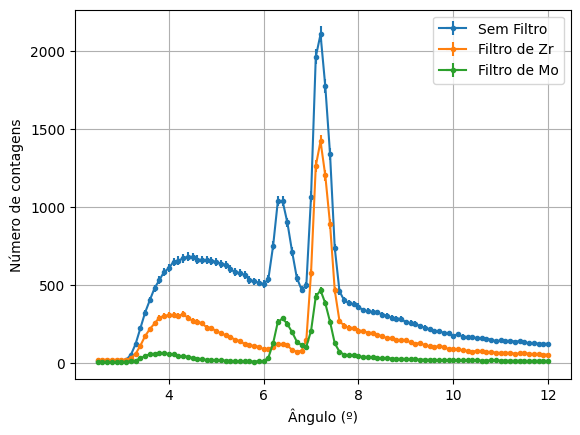

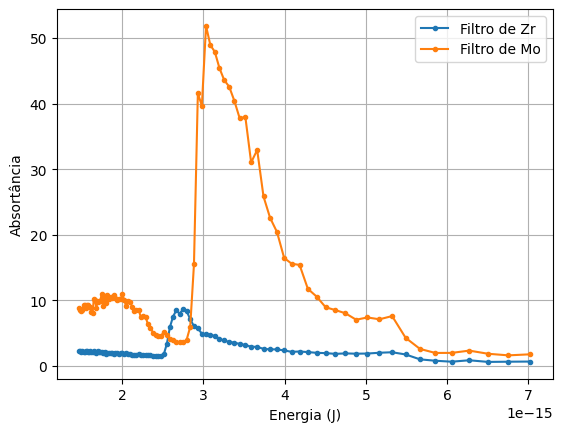

Espessura do Molibdênio: 0.0004084463325814719
Incerteza Espessura do Molibdênio: 2.448011754608499e-08
Espessura do Zircônio: 0.0003516273198447663
Incerteza Espessura do Zircônio: 1.8822611247653644e-08


In [36]:
# Criando novas colunas com as incertezas dos valores, incluindo a correção do tempo morto.
abs['E'] = 0.005
abs['F'] = np.sqrt((np.sqrt(abs['B'])/(1-abs['B']*poptTM2[1])**2)**2 + (((abs['B']*poptTM2[1])/(1-abs['B']*poptTM2[1])**2)*np.sqrt(pcovTM2[1][1]))**2)
abs['G'] = np.sqrt((np.sqrt(abs['C'])/(1-abs['C']*poptTM2[1])**2)**2 + (((abs['C']*poptTM2[1])/(1-abs['C']*poptTM2[1])**2)*np.sqrt(pcovTM2[1][1]))**2)
abs['H'] = np.sqrt((np.sqrt(abs['D'])/(1-abs['D']*poptTM2[1])**2)**2 + (((abs['D']*poptTM2[1])/(1-abs['D']*poptTM2[1])**2)*np.sqrt(pcovTM2[1][1]))**2)
abs['B'] = abs['B']/(1-(pcovTM2[1][1]*abs['B']))
abs['C'] = abs['C']/(1-(pcovTM2[1][1]*abs['C']))
abs['D'] = abs['D']/(1-(pcovTM2[1][1]*abs['D']))

# Criando nova coluna no dataframe da absortância que coloca a energia correspondente a cada ângulo, usando o valor de h obtido anteriormente. Também criar a coluna da respectiva incerteza.
abs['I'] = (h*299792458)/(2*0.282e-9*np.sin(abs['A']*math.pi/180))
abs['J'] = np.sqrt((299792458*sigma_h/(2*0.282e-9*np.sin(abs['A']*math.pi/180)))**2 + (h*299792458*np.cos(abs['A']*math.pi/180)*abs['E']/(2*0.282e-9*np.sin(abs['A']*math.pi/180))**2)**2)

# Plotando Contagem de Fótons/Segundo em função do Ângulo
plt.errorbar(abs['A'], abs['B'], abs['F'], abs['E'], label='Sem Filtro', marker='.')
plt.errorbar(abs['A'], abs['C'], abs['G'], abs['E'], label='Filtro de Zr', marker='.')
plt.errorbar(abs['A'], abs['D'], abs['H'], abs['E'], label='Filtro de Mo', marker='.')
plt.xlabel('Ângulo (º)')
plt.ylabel('Número de contagens')
plt.grid()
plt.legend()
plt.show()

# Calculando a absortância para o Zr e o Mo, bem como suas incertezas
abs['K'] = abs['B']/abs['C']
abs['L'] = abs['B']/abs['D']
abs['M'] = np.sqrt((abs['F']/abs['C'])**2 + (abs['B']*abs['G']/(abs['C'])**2)**2)
abs['N'] = np.sqrt((abs['F']/abs['D'])**2 + (abs['B']*abs['H']/(abs['D'])**2)**2)
# Plotando a absortância em função da energia para o Zr e o Mo
# plt.errorbar(abs['I'], abs['K'], abs['M'], 0, label='Filtro de Zr', marker='.')
# plt.errorbar(abs['I'], abs['L'], abs['N'], 0, label='Filtro de Mo', marker='.')
plt.plot(abs['I'], abs['K'], label='Filtro de Zr', marker='.')
plt.plot(abs['I'], abs['L'], label='Filtro de Mo', marker='.')
plt.xlabel('Energia (J)')
plt.ylabel('Absortância')
plt.grid()
plt.legend()
plt.show()

# Usando a lei de Lambert-Beer para obter a espessura do absorvedor
# x = -ln(It/I0)/(mu rho)
RhoMo = 10.02
RhoZr = 6.45
def LigaGrafico(x, x1, y1, x2, y2):
    return(x*(y1-y2)/(x1-x2) + (x1*y2-x2*y1)/(x1-x2))

Energias = [1e-2,1.5e-2,2e-2,3e-2,4e-2]
MuSobreRhoMo = [85.76,28.54,80.54,28.10,12.94]
MuSobreRhoZr = [74.17,24.63,72.37,24.85,11.39]


ListaMuMo = []
ListaMuZr = []

SigmaListaMuZr = []
SigmaListaMuMo = []

energiasgraf = list(abs['I'])
sigma_energiasgraf = list(abs['J'])


selecEnergiasgraf = []
ListaIndicesEnergias = []
for i in range (len(energiasgraf)):
    for j in range(4):
        if Energias[j]*1.602176634*10**(-13) < energiasgraf[i] <= Energias[j+1]*1.602176634*10**(-13):
            ListaMuMo = ListaMuMo + [LigaGrafico(energiasgraf[i], Energias[j]*1.602176634*10**(-13), MuSobreRhoMo[j], Energias[j+1]*1.602176634*10**(-13), MuSobreRhoMo[j+1])]
            ListaMuZr = ListaMuZr + [LigaGrafico(energiasgraf[i], Energias[j]*1.602176634*10**(-13), MuSobreRhoZr[j], Energias[j+1]*1.602176634*10**(-13), MuSobreRhoZr[j+1])]
            selecEnergiasgraf = selecEnergiasgraf + [energiasgraf[i]]
            SigmaListaMuZr = SigmaListaMuZr + [np.abs(sigma_energiasgraf[i]*(MuSobreRhoZr[j+1] - MuSobreRhoZr[j])/(Energias[j+1]-Energias[j]))]
            SigmaListaMuMo = SigmaListaMuMo + [np.abs(sigma_energiasgraf[i]*(MuSobreRhoMo[j+1] - MuSobreRhoMo[j])/(Energias[j+1]-Energias[j]))]
            ListaIndicesEnergias = ListaIndicesEnergias + [i]

def fconst(x, a):
    return(a)
def lambert_beer(mu, energia, elemento):
    if elemento == 'Mo':
        return np.log(abs.loc[abs['I'] == energia, 'L'].item())/(mu*(RhoMo)**2)
    elif elemento == 'Zr':
        return np.log(abs.loc[abs['I'] == energia, 'K'].item())/(mu*(RhoZr)**2)

ListaXMo = []
ListaXZr = []
for i in range(len(ListaMuMo)):
    ListaXMo = ListaXMo + [lambert_beer(ListaMuMo[i], selecEnergiasgraf[i], 'Mo')]
for i in range(len(ListaMuZr)):
    ListaXZr = ListaXZr + [lambert_beer(ListaMuZr[i], selecEnergiasgraf[i], 'Zr')]

poptMo, pcovMo = curve_fit(fconst, ListaIndicesEnergias, ListaXMo, sigma=SigmaListaMuMo, absolute_sigma=True)
poptZr, pcovZr = curve_fit(fconst, ListaIndicesEnergias, ListaXZr, sigma=SigmaListaMuZr, absolute_sigma=True)

print(f'Espessura do Molibdênio: {poptMo[0]}\nIncerteza Espessura do Molibdênio: {pcovMo[0][0]}\nEspessura do Zircônio: {poptZr[0]}\nIncerteza Espessura do Zircônio: {pcovZr[0][0]}')